# Librerie

In [1]:
import os
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import joblib
from scipy.signal import resample
from sklearn.utils import shuffle
from scipy.stats import ttest_ind
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from sklearn.svm import SVC
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount ('/content/drive', force_remount=True)
path="/content/drive/My Drive/Applicazioni di ML"

Mounted at /content/drive


# Dati

In [3]:
matSpK = np.load(path + '/matSpK.npy')
matdevSpK = np.load(path + '/matdevSpK.npy')
matSsK = np.load(path + '/matSsK.npy')
matdevSsK = np.load(path + '/matdevSsK.npy')
matAK = np.load(path + '/matAK.npy')
matdevAK = np.load(path + '/matdevAK.npy')

PCA2matSpK = np.load(path + '/PCA2matSpK.npy')
PCA2matdevSpK = np.load(path + '/PCA2matdevSpK.npy')
PCA2matSsK = np.load(path + '/PCA2matSsK.npy')
PCA2matdevSsK = np.load(path + '/PCA2matdevSsK.npy')
PCA2matAK = np.load(path + '/PCA2matAK.npy')
PCA2matdevAK = np.load(path + '/PCA2matdevAK.npy')
eigenvalues = np.load(path + '/eigenvalues.npy')
eigenvectors = np.load(path + '/eigenvectors.npy')

PCA5matSpK = np.load(path + '/PCA5matSpK.npy')
PCA5matdevSpK = np.load(path + '/PCA5matdevSpK.npy')
PCA5matSsK = np.load(path + '/PCA5matSsK.npy')
PCA5matdevSsK = np.load(path + '/PCA5matdevSsK.npy')
PCA5matAK = np.load(path + '/PCA5matAK.npy')
PCA5matdevAK = np.load(path + '/PCA5matdevAK.npy')

matSpK_NN = np.load(path + '/matSpK_NN.npy')
matdevSpK_NN = np.load(path + '/matdevSpK_NN.npy')
matSsK_NN = np.load(path + '/matSsK_NN.npy')
matdevSsK_NN = np.load(path + '/matdevSsK_NN.npy')
matAK_NN = np.load(path + '/matAK_NN.npy')
matdevAK_NN = np.load(path + '/matdevAK_NN.npy')

PCAmatSpK_NN = np.load(path + '/PCAmatSpK_NN.npy')
PCAmatdevSpK_NN = np.load(path + '/PCAmatdevSpK_NN.npy')
PCAmatSsK_NN = np.load(path + '/PCAmatSsK_NN.npy')
PCAmatdevSsK_NN = np.load(path + '/PCAmatdevSsK_NN.npy')
PCAmatAK_NN = np.load(path + '/PCAmatAK_NN.npy')
PCAmatdevAK_NN = np.load(path + '/PCAmatdevAK_NN.npy')

matSpK_SVM = np.load(path + '/matSpK_SVM.npy')
matdevSpK_SVM = np.load(path + '/matdevSpK_SVM.npy')
matSsK_SVM = np.load(path + '/matSsK_SVM.npy')
matdevSsK_SVM = np.load(path + '/matdevSsK_SVM.npy')
matAK_SVM = np.load(path + '/matAK_SVM.npy')
matdevAK_SVM = np.load(path + '/matdevAK_SVM.npy')

In [4]:
data = loadmat(path+ '/spectra.mat')
print(data.keys())

nir_matrix = data['NIR']
df = pd.DataFrame(nir_matrix)

# Stampa il DataFrame
df.columns = np.arange(900, 1700 + 1, 2)
df

dict_keys(['__header__', '__version__', '__globals__', 'Description', 'octane', 'None', 'NIR', '__function_workspace__'])


,900,902,904,906,908,910,912,914,916,918,...,1682,1684,1686,1688,1690,1692,1694,1696,1698,1700
0,-0.050193,-0.045903,-0.042187,-0.037177,-0.033348,-0.031207,-0.030036,-0.031298,-0.034217,-0.036012,...,1.198461,1.224243,1.242645,1.250789,1.246626,1.250985,1.264189,1.244678,1.245913,1.221135
1,-0.044227,-0.039602,-0.035673,-0.030911,-0.026675,-0.023871,-0.022571,-0.025410,-0.028960,-0.032740,...,1.128877,1.148342,1.189116,1.223242,1.253306,1.282889,1.215065,1.225211,1.227985,1.198851
2,-0.046867,-0.041260,-0.036979,-0.031458,-0.026520,-0.023346,-0.021392,-0.024993,-0.029309,-0.033920,...,1.147964,1.167798,1.198287,1.237383,1.260979,1.276677,1.218871,1.223132,1.230321,1.208742
3,-0.046705,-0.042240,-0.038561,-0.034513,-0.030206,-0.027680,-0.026042,-0.028280,-0.030920,-0.034012,...,1.160089,1.169350,1.201066,1.233299,1.262966,1.272709,1.211068,1.215044,1.232655,1.206696
4,-0.050859,-0.045145,-0.041025,-0.036357,-0.032747,-0.031498,-0.031415,-0.034611,-0.037781,-0.040752,...,1.252712,1.238013,1.259616,1.273713,1.296524,1.299507,1.226448,1.230718,1.232864,1.202926
5,-0.048094,-0.042739,-0.038812,-0.034017,-0.030143,-0.027690,-0.026387,-0.028811,-0.031481,-0.034124,...,1.214046,1.210217,1.241090,1.262138,1.288401,1.291118,1.229769,1.227615,1.227630,1.207576
6,-0.049906,-0.044558,-0.040543,-0.035716,-0.031844,-0.029581,-0.027915,-0.030292,-0.033590,-0.037184,...,1.234174,1.226153,1.245143,1.265648,1.274731,1.292441,1.218317,1.218147,1.222273,1.200446
7,-0.049293,-0.043788,-0.039429,-0.034193,-0.029588,-0.026455,-0.025104,-0.028102,-0.031801,-0.036157,...,1.187996,1.192901,1.222581,1.245782,1.260020,1.290305,1.221264,1.220265,1.227947,1.188174
8,-0.049885,-0.044279,-0.040158,-0.034954,-0.031114,-0.028390,-0.027017,-0.029609,-0.032937,-0.036862,...,1.219162,1.214365,1.234969,1.251559,1.272416,1.287405,1.211995,1.213263,1.215883,1.196102
9,-0.051054,-0.045678,-0.041673,-0.036761,-0.033078,-0.030466,-0.029295,-0.031736,-0.034843,-0.038419,...,1.227318,1.224755,1.238409,1.262493,1.272277,1.289548,1.213103,1.212666,1.216313,1.192221


In [5]:
description = data['Description']
description

array(['== Spectral and octane data of gasoline ==                              ',
       '                                                                        ',
       'NIR spectra and octane numbers of 60 gasoline samples                   ',
       '                                                                        ',
       'NIR:     NIR spectra, measured in 2 nm intervals from 900 nm to 1700 nm ',
       'octane:  octane numbers                                                 ',
       'spectra: a dataset array containing variables for NIR and octane        ',
       '                                                                        ',
       'Reference:                                                              ',
       'Kalivas, John H., "Two Data Sets of Near Infrared Spectra," Chemometrics',
       'and Intelligent Laboratory Systems, v.37 (1997) pp.255–259              '],
      dtype='<U72')

In [6]:
octane = data['octane']
octane.shape

(60, 1)

In [7]:
function = data['__function_workspace__']
function.shape

(1, 195680)

Le classi che consideriamo sono:

* 0: carburante di bassa qualità

* 1: carburante di alta qualità

In [8]:
cutoff = 87  # o qualsiasi altro valore # da qualita dei campioni quindi bassa qualita o alta. Modello predittivo della qualità
labels = (octane > cutoff).astype(int)
labels

num_zeri = np.sum(labels == 0)
num_uno = np.sum(labels == 1)

print(f"Numero di 0: {num_zeri}")
print(f"Numero di 1: {num_uno}")

Numero di 0: 23
Numero di 1: 37


In [9]:
df.columns = df.columns.astype(str) # i nomi delle colonne sono tutti dello stesso tipo

In [10]:
df['Labels'] = labels

# Mischia il DataFrame
df_mischiato = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Dividi i dati in test (30%) e train (70%)
test_data = df_mischiato.sample(frac=0.3, random_state=42)
train_data = df_mischiato.drop(test_data.index).reset_index(drop=True)

# Estrai la colonna 'Labels' per test e train
labels_test = test_data['Labels']
labels_train = train_data['Labels']
train_data=train_data.iloc[:,:-1]
test_data=test_data.iloc[:,:-1]

# Visualizzazione spettri

In [11]:
spettro_originale = df.to_numpy()

num_spettri, num_campioni = spettro_originale.shape
x = np.arange(900, 1700 + 1, 2)

fig = go.Figure()

# Aggiunge ogni spettro (riga) come una linea nel grafico
for i in range(num_spettri):
    fig.add_trace(go.Scatter(x=x,y=spettro_originale[i],mode='lines',
        name=f'Spettro {i}'))

# Aggiorna assi (puoi modificarli come ti serve)
fig.update_xaxes(range=[900,1700])
fig.update_layout(
    xaxis_title="Campioni",
    yaxis_title="Valori"
)
fig.show()

La posizione dei picchi coincide con l'assorbimento IR:

* 1200-> gruppi metilici

* 1400-> etnolo/ H2O

* 1600-> vibrazioni CH

# Funzioni

## Train test

In [12]:
def evaluate_model(train_data, train_labels, validation_data, validation_labels, nTrees):
    model = RandomForestClassifier(n_estimators=nTrees, random_state=42)
    model.fit(train_data, train_labels)
    predictions = model.predict(validation_data)

    cm = confusion_matrix(validation_labels, predictions, labels=[0, 1])

    TN, FP, FN, TP = cm.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    return accuracy, sensitivity, specificity

## Cross validation

In [13]:
def cross_validation(df, labels, k, n, nTrees):
    sensitivity_tot = []
    specificity_tot = []
    accuracy_tot = []

    for _ in range(n):

        skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=None)
        for train_index, test_index in skf.split(df, labels):
            train_data, test_data = df.iloc[train_index], df.iloc[test_index]
            train_labels, test_labels = labels[train_index], labels[test_index]

            acc, sens, spec = evaluate_model(train_data, train_labels, test_data, test_labels, nTrees)

            accuracy_tot.append(acc)
            sensitivity_tot.append(sens)
            specificity_tot.append(spec)

    return np.array(accuracy_tot), np.array(sensitivity_tot), np.array(specificity_tot)



## Massimi

In [14]:
def miglior_massimo(mat, matdev):
    mat_flat = mat.flatten()
    matdev_flat = matdev.flatten()

    migliore = mat_flat[0]
    migliore_idx = 0

    for i in range(1, len(mat_flat)):
        distrib1 = np.random.normal(migliore, matdev_flat[migliore_idx], 1000)
        distrib2 = np.random.normal(mat_flat[i], matdev_flat[i], 1000)

        t_stat, p_value = ttest_ind(distrib1, distrib2)

        if np.mean(distrib2) > np.mean(distrib1) and p_value < 0.05:
            migliore = mat_flat[i]
            migliore_idx = i

    valore = float(mat_flat[migliore_idx])
    errore = float(matdev_flat[migliore_idx])

    print(f"Massimo: {valore}, Errore: {errore}")

# Grafici

### Grafico n-Trees fissato

In [15]:
def plot_results_k(medie, dev, labels, M):
    colore_predominante = "#005F8C"
    colore_tenue = "#A8CDE0"
    plt.figure(figsize=(6, 4))
    plt.plot(labels, medie, linestyle='-', marker='o', color=colore_predominante, label="Accuracy")
    plt.errorbar(labels, medie, yerr=dev, fmt='o', capsize=5, capthick=2, color=colore_tenue, ecolor='r')
    plt.ylabel(f"{M}")
    plt.xlabel("K")
    plt.ylim(0.6,1)
    plt.show()

### Grafico k fissato

In [16]:
def plot_results_trees(medie, dev, labels, M):
    colore_predominante = "#005F8C"
    colore_tenue = "#A8CDE0"
    plt.figure(figsize=(6, 4))
    plt.plot(labels, medie, linestyle='-', marker='o', color=colore_predominante, label="Accuracy")
    plt.errorbar(labels, medie, yerr=dev, fmt='.', capsize=5, capthick=2, color=colore_tenue, ecolor='r')
    plt.ylabel(f"{M}")
    plt.xlabel("nTrees")
    plt.ylim(0.6,1)
    step = 5  # Mostra ogni 5° valore
    selected_labels = labels[::step]  # Seleziona ogni 5° valore di labels
    plt.xticks(selected_labels, rotation=45)

    plt.show()

### Grafico 3D

In [17]:
def plot_3d(nTrees_values, k_values, mat, M):

    X, Y = np.meshgrid(nTrees_values, k_values)
    Z = mat.T  # Trasponi per far combaciare

    fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])

    fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                      highlightcolor="limegreen", project_z=True))

    fig.update_layout(
        scene_camera_eye=dict(x=1.5, y=1.5, z=1),
        scene=dict(
            xaxis_title='nTrees',
            yaxis_title='k',
            zaxis_title=M
        ),
        width=800, height=700
    )

    fig.show()


# Main

### Main n-Trees fissato

Viene eseguito un grafico delle metriche variando il numero di fold $k$ da 2 a 15, mantenendo fisso a 130 il numero di alberi. Ogni valutazione del modello è ripetuta 15 volte, e per ciascun valore di $k$ vengono riportate la media e l’errore sulla media delle metriche.

In [18]:
def main(df, labels, N=15, n=15, nTrees=20):
    medieSs = []
    medieA = []
    medieSp = []
    devSs = []
    devA = []
    devSp = []
    label_names = []

    for k in range(2, N+1):


      accuracy_tot = cross_validation(df, labels, k, n, nTrees)[0]
      mediaA = np.mean(accuracy_tot)
      sigmaA = np.std(accuracy_tot, ddof=1)/np.sqrt(n) # ddof=1 con correzione di Bessel

      sensitivity_tot = cross_validation(df, labels, k, n, nTrees)[1]
      mediaSs = np.mean(sensitivity_tot)
      sigmaSs = np.std(sensitivity_tot, ddof=1)/np.sqrt(n)

      specificity_tot = cross_validation(df, labels, k, n, nTrees)[2]
      mediaSp = np.mean(specificity_tot)
      sigmaSp = np.std(specificity_tot, ddof=1)/np.sqrt(n)

      medieSs.append(mediaSs)
      medieSp.append(mediaSp)
      medieA.append(mediaA)
      devA.append(sigmaA)
      devSs.append(sigmaSs)
      devSp.append(sigmaSp)
      label_names.append(f'k{k}')

    plot_results_k(np.array(medieA), np.array(devA), label_names, "Accuracy")
    plot_results_k(np.array(medieSs), np.array(devSs), label_names, "Sensitivity")
    plot_results_k(np.array(medieSp), np.array(devSp), label_names, "Specificity")

### Main k fissato

Viene eseguito un grafico delle metriche variando il numero di alberi da 20 a 500 con uno step di 20, mantenendo fisso a 4 il numero di fold. Ogni valutazione del modello è ripetuta 15 volte e per ciascun valore di $k$ vengono riportate la media e l’errore sulla media delle metriche.

In [19]:
def main_2(df, labels, n=15, k=5):

    medieSs = []
    medieSp = []
    medieA = []
    devSs = []
    devA = []
    devSp = []
    label_names = []

    for nTrees in range(20, 100, 5):

      accuracy_tot = cross_validation(df, labels, k, n, nTrees)[0]
      mediaA = np.mean(accuracy_tot)
      sigmaA = np.std(accuracy_tot, ddof=1)/np.sqrt(n)

      sensitivity_tot = cross_validation(df, labels, k, n, nTrees)[1]
      mediaSs = np.mean(sensitivity_tot)
      sigmaSs = np.std(sensitivity_tot, ddof=1)/np.sqrt(n)

      specificity_tot = cross_validation(df, labels, k, n, nTrees)[2]
      mediaSp = np.mean(specificity_tot)
      sigmaSp = np.std(specificity_tot, ddof=1)/np.sqrt(n)

      medieSs.append(mediaSs)
      medieA.append(mediaA)
      medieSp.append(mediaSp)
      devSs.append(sigmaSs)
      devA.append(sigmaA)
      devSp.append(sigmaSp)
      label_names.append(f'{nTrees}')

    plot_results_trees(np.array(medieA), np.array(devA), label_names, "Accuracy")
    plot_results_trees(np.array(medieSs), np.array(devSs), label_names, "Sensitivity")
    plot_results_trees(np.array(medieSp), np.array(devSp), label_names, "Specificity")

### Main salva metriche

Vengono salvate le metriche in dei file '.npy' variando il numero di alberi da 20 a 500 con uno step di 20 e variando il numero di fold da 2 a 15. Ogni valutazione del modello è ripetuta 15 volte e per ciascun valore di $k$ vengono riportate la media e l’errore sulla media delle metriche.

In [20]:
def main_3(df, labels, N=15, n=15):
    matSs = []
    mat_devSs = []
    matSp = []
    mat_devSp = []
    matA = []
    mat_devA = []

    for nTrees in range(20, 100, 5):
        medieSs = []
        medieSp = []
        medieA = []
        sigmeSs = []
        sigmeSp = []
        sigmeA = []

        for k in range(2, N):
            accuracy_tot, sensitivity_tot, specificity_tot = cross_validation(df, labels, k, n, nTrees)

            mediaA = np.mean(accuracy_tot)
            sigmaA = np.std(accuracy_tot, ddof=1) / np.sqrt(n)

            mediaSs = np.mean(sensitivity_tot)
            sigmaSs = np.std(sensitivity_tot, ddof=1) / np.sqrt(n)

            mediaSp = np.mean(specificity_tot)
            sigmaSp = np.std(specificity_tot, ddof=1) / np.sqrt(n)

            medieA.append(mediaA)
            sigmeA.append(sigmaA)
            medieSs.append(mediaSs)
            sigmeSs.append(sigmaSs)
            medieSp.append(mediaSp)
            sigmeSp.append(sigmaSp)

        matSs.append(medieSs)
        mat_devSs.append(sigmeSs)
        matA.append(medieA)
        mat_devA.append(sigmeA)
        matSp.append(medieSp)
        mat_devSp.append(sigmeSp)

    np.save(path + '/matdevAK.npy', mat_devA)
    np.save(path + '/matAK.npy', matA)
    np.save(path + '/matdevSpK.npy', mat_devSp)
    np.save(path + '/matSpK.npy', matSp)
    np.save(path + '/matdevSsK.npy', mat_devSs)
    np.save(path + '/matSsK.npy', matSs)


### Main grafici 3D

Vengono stampati i grafici 3D delle metriche e i relativi massimi a partire dai file salvati con la precedente funzione.

In [21]:
 def analizza_metriche(Ac, Acdev, Ss, Ssdev, Sp, Spdev):

  # Definizione degli assi
  nTrees_values = np.arange(20, 100, 5)
  k_values = np.arange(2, 15)

  # Plot Accuratezza
  plot_3d(nTrees_values, k_values, Ac, "Accuracy")
  miglior_massimo(Ac, Acdev)

  # Plot Sensibilità
  plot_3d(nTrees_values, k_values, Ss, "Sensitivity")
  miglior_massimo(Ss, Ssdev)

  # Plot Specificità
  plot_3d(nTrees_values, k_values, Sp, "Specificity")
  miglior_massimo(Sp, Spdev)

#Risultati

### n-Trees fissato a 20

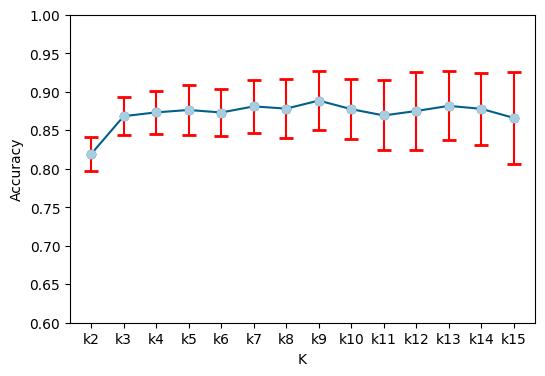

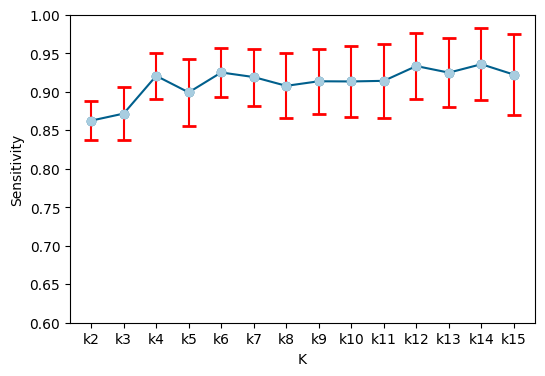

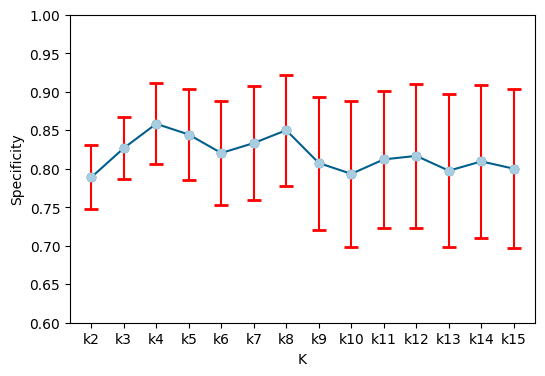

In [22]:
main(train_data,labels_train)

### k fissato a 5

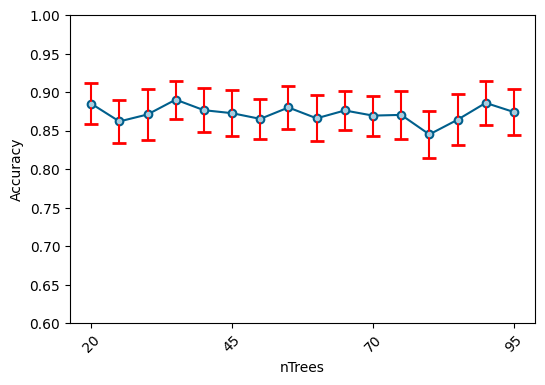

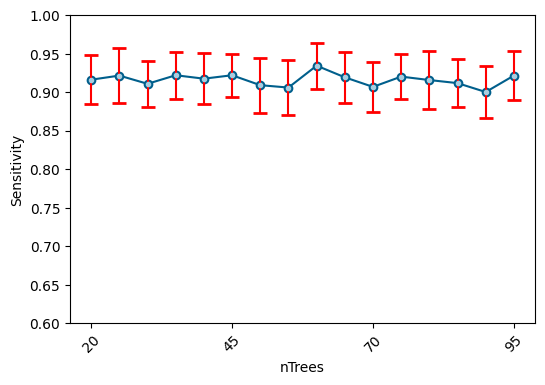

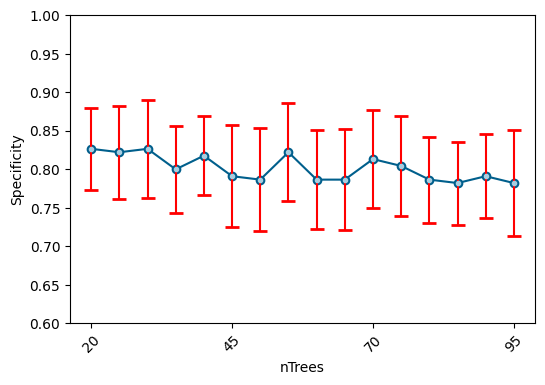

In [23]:
main_2(train_data,labels_train)

### Grafico 3D

In [24]:
#main_3(train_data, labels_train, N=15, n=7)

In [25]:
analizza_metriche(matAK, matdevAK, matSsK, matdevSsK, matSpK, matdevSpK )

Massimo: 0.8985185185185185, Errore: 0.03808019623276934


Massimo: 0.9481481481481481, Errore: 0.040247755601162026


Massimo: 0.8507936507936509, Errore: 0.06112775886019028


# MODELLO CON PCA


## Autovalori e autovettori

Matrice di correlazione

In [26]:
PCA_train = train_data.corr()
PCA_train

,900,902,904,906,908,910,912,914,916,918,...,1682,1684,1686,1688,1690,1692,1694,1696,1698,1700
900,1.000000,0.995847,0.995114,0.984967,0.977452,0.969104,0.961051,0.967410,0.979521,0.980641,...,-0.355953,-0.316021,-0.386906,-0.128906,0.083622,0.023650,-0.058386,-0.211207,0.144246,0.060975
902,0.995847,1.000000,0.997467,0.986203,0.981220,0.974243,0.967260,0.971036,0.979812,0.979844,...,-0.357761,-0.313152,-0.388855,-0.134353,0.077758,0.023793,-0.051292,-0.207625,0.147174,0.064485
904,0.995114,0.997467,1.000000,0.990599,0.987621,0.981962,0.972915,0.978136,0.983944,0.980606,...,-0.384886,-0.344909,-0.418217,-0.159263,0.068985,0.035130,-0.058734,-0.214072,0.144625,0.057745
906,0.984967,0.986203,0.990599,1.000000,0.994407,0.989819,0.975861,0.980530,0.986239,0.975781,...,-0.427179,-0.395748,-0.450646,-0.180976,0.112698,0.065919,-0.065410,-0.187292,0.162416,0.083393
908,0.977452,0.981220,0.987621,0.994407,1.000000,0.996340,0.988984,0.988265,0.987666,0.970050,...,-0.477221,-0.436338,-0.492018,-0.230149,0.068475,0.036963,-0.066550,-0.193249,0.136727,0.062376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,0.023650,0.023793,0.035130,0.065919,0.036963,0.052493,-0.032649,0.053879,0.011964,0.059038,...,0.076072,0.112878,0.135845,0.329643,0.707104,1.000000,0.548849,0.606717,0.822919,0.694324
1694,-0.058386,-0.051292,-0.058734,-0.065410,-0.066550,-0.062656,-0.086958,-0.036535,-0.112233,-0.049299,...,0.220770,0.477988,0.504977,0.515566,0.587266,0.548849,1.000000,0.829082,0.702782,0.859257
1696,-0.211207,-0.207625,-0.214072,-0.187292,-0.193249,-0.196403,-0.228997,-0.205431,-0.255715,-0.204969,...,0.220044,0.395818,0.539041,0.482138,0.711460,0.606717,0.829082,1.000000,0.687126,0.825893
1698,0.144246,0.147174,0.144625,0.162416,0.136727,0.142306,0.070142,0.144107,0.107621,0.174125,...,0.159427,0.231282,0.285002,0.588420,0.783873,0.822919,0.702782,0.687126,1.000000,0.837363


In [27]:
eigenvalues, eigenvectors = np.linalg.eig(PCA_train)

Matrice degli autovalori

In [28]:
PCA_al = pd.DataFrame(np.diag(eigenvalues), columns=[f'λ{i+1}' for i in range(len(eigenvalues))])
PCA_al

,λ1,λ2,λ3,λ4,λ5,λ6,λ7,λ8,λ9,λ10,...,λ392,λ393,λ394,λ395,λ396,λ397,λ398,λ399,λ400,λ401
0,286.817358+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j
1,0.000000+ 0.000000j,70.965974+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j
2,0.000000+ 0.000000j,0.000000+ 0.000000j,20.279999+ 0.000000j,0.000000+ 0.000000j,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j
3,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,13.660569+ 0.000000j,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j
4,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,3.106555+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-6.386028e-17+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j
397,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000e+00+0.000000e+ 00j,-6.563148e-16+2.258647e- 16j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j
398,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,-6.563148e-16-2.258647e- 16j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j
399,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,0.000000e+00+0.000000e+ 00j,-4.376465e-16+1.845828e- 16j,0.000000e+00+0.000000e+ 00j


Matrice degli autovettori

In [29]:
PCA_av = pd.DataFrame(eigenvectors, columns=[f'V{i+1}' for i in range(eigenvectors.shape[1])])
PCA_av

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401
0,-0.051686+0.000000j,0.036991+0.000000j,0.065588+0.000000j,0.048701+0.000000j,0.028645+0.000000j,-0.006278+0.000000j,0.023923+0.000000j,0.049995+0.000000j,-0.075319+0.000000j,-0.031104+0.000000j,...,0.074442+0.000793j,0.074442-0.000793j,-0.088930+0.000000j,-0.069282+0.013908j,-0.069282-0.013908j,-0.053443+0.000000j,-0.016013-0.008069j,-0.016013+0.008069j,0.011915-0.000301j,0.011915+0.000301j
1,-0.051366+0.000000j,0.037412+0.000000j,0.071322+0.000000j,0.043516+0.000000j,0.034228+0.000000j,-0.013675+0.000000j,0.017447+0.000000j,0.017907+0.000000j,-0.075116+0.000000j,-0.039385+0.000000j,...,0.003354-0.002225j,0.003354+0.002225j,-0.003545+0.000000j,-0.001947+0.001566j,-0.001947-0.001566j,-0.001034+0.000000j,-0.004309+0.001222j,-0.004309-0.001222j,0.005673-0.000178j,0.005673+0.000178j
2,-0.052084+0.000000j,0.033806+0.000000j,0.072885+0.000000j,0.039024+0.000000j,0.027846+0.000000j,-0.019441+0.000000j,0.018289+0.000000j,0.005764+0.000000j,-0.069092+0.000000j,-0.049413+0.000000j,...,-0.003526-0.001814j,-0.003526+0.001814j,-0.002429+0.000000j,-0.000232+0.000089j,-0.000232-0.000089j,-0.000149+0.000000j,-0.002775-0.001412j,-0.002775+0.001412j,0.003252-0.005386j,0.003252+0.005386j
3,-0.054155+0.000000j,0.027031+0.000000j,0.066646+0.000000j,0.020021+0.000000j,0.010470+0.000000j,-0.043222+0.000000j,0.021132+0.000000j,0.019614+0.000000j,-0.056557+0.000000j,0.004792+0.000000j,...,0.009672-0.007077j,0.009672+0.007077j,-0.014495+0.000000j,-0.009314-0.001939j,-0.009314+0.001939j,-0.016611+0.000000j,0.015162-0.001381j,0.015162+0.001381j,0.000843-0.003262j,0.000843+0.003262j
4,-0.053590+0.000000j,0.020465+0.000000j,0.079833+0.000000j,0.020017+0.000000j,0.025389+0.000000j,-0.040219+0.000000j,0.010849+0.000000j,0.019054+0.000000j,-0.050023+0.000000j,-0.008267+0.000000j,...,0.015559+0.009714j,0.015559-0.009714j,-0.017114+0.000000j,0.006170-0.000764j,0.006170+0.000764j,-0.018473+0.000000j,0.010207-0.003386j,0.010207+0.003386j,-0.011102-0.000375j,-0.011102+0.000375j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,-0.017292+0.000000j,0.006930+0.000000j,-0.119066+0.000000j,-0.121974+0.000000j,0.173901+0.000000j,0.119041+0.000000j,0.011051+0.000000j,-0.352175+0.000000j,0.388185+0.000000j,-0.237970+0.000000j,...,-0.011978-0.004575j,-0.011978+0.004575j,0.010464+0.000000j,-0.007338+0.001410j,-0.007338-0.001410j,0.004388+0.000000j,0.004222+0.002766j,0.004222-0.002766j,0.004621-0.003051j,0.004621+0.003051j
397,0.000311+0.000000j,0.015858+0.000000j,-0.048663+0.000000j,-0.112564+0.000000j,0.440870+0.000000j,0.181127+0.000000j,0.152195+0.000000j,-0.010973+0.000000j,-0.108587+0.000000j,0.084864+0.000000j,...,0.002030-0.009853j,0.002030+0.009853j,0.029153+0.000000j,0.033119-0.007654j,0.033119+0.007654j,0.014915+0.000000j,0.007310+0.010454j,0.007310-0.010454j,0.020679-0.011648j,0.020679+0.011648j
398,0.002365+0.000000j,0.002407+0.000000j,-0.087689+0.000000j,-0.141058+0.000000j,0.365872+0.000000j,0.154351+0.000000j,-0.084126+0.000000j,0.010928+0.000000j,-0.032565+0.000000j,0.444686+0.000000j,...,0.057811+0.011318j,0.057811-0.011318j,-0.035348+0.000000j,-0.028079+0.002645j,-0.028079-0.002645j,-0.042301+0.000000j,0.019463-0.025352j,0.019463+0.025352j,-0.050237+0.001941j,-0.050237-0.001941j
399,-0.019225+0.000000j,0.024478+0.000000j,-0.106291+0.000000j,-0.114470+0.000000j,0.285332+0.000000j,0.117839+0.000000j,0.044120+0.000000j,-0.155337+0.000000j,0.149857+0.000000j,-0.465141+0.000000j,...,-0.008547+0.015735j,-0.008547-0.015735j,-0.043985+0.000000j,-0.037083+0.003363j,-0.037083-0.003363j,-0.027237+0.000000j,0.009133-0.003322j,0.009133+0.003322j,-0.022109+0.008739j,-0.022109-0.008739j


## Varianza cumulata

Riordiniamo gli autovalori in modo decrescente (anche i corrispettivi autovettori) e per ognuno calcoliamo la varianza cumulata.

In [30]:
# Ordinare gli autovalori in ordine decrescente e ottenere gli indici di ordinamento
idx = np.argsort(eigenvalues)[::-1]

# Riordinare autovalori e autovettori secondo questi indici
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

somma = np.sum(eigenvalues)
print("La somma degli autovalori è: ", somma)

perc = eigenvalues / somma * 100
perc_cumulativa = np.cumsum(perc)

# Creazione della tabella con i primi 50 autovalori
perc_tab = pd.DataFrame({'Autovalori': eigenvalues[:50], '%': perc[:50], 'Cumulativa %': perc_cumulativa[:50]})
perc_tab

La somma degli autovalori è:  (400.99999999999994-3.944304526105059e-31j)


,Autovalori,%,Cumulativa %
0,2.868174e+02+0.000000e+ 00j,7.152553e+01+7.035373e- 32j,71.525526+ 0.000000j
1,7.096597e+01+0.000000e+ 00j,1.769725e+01+1.740732e- 32j,89.222776+ 0.000000j
2,2.028000e+01+0.000000e+ 00j,5.057356e+00+4.974502e- 33j,94.280132+ 0.000000j
3,1.366057e+01+0.000000e+ 00j,3.406626e+00+3.350815e- 33j,97.686758+ 0.000000j
4,3.106555e+00+0.000000e+ 00j,7.747021e-01+7.620102e- 34j,98.461460+ 0.000000j
5,1.700641e+00+0.000000e+ 00j,4.241001e-01+4.171521e- 34j,98.885560+ 0.000000j
6,1.125652e+00+0.000000e+ 00j,2.807113e-01+2.761124e- 34j,99.166271+ 0.000000j
7,8.537984e-01+0.000000e+ 00j,2.129173e-01+2.094291e- 34j,99.379189+ 0.000000j
8,7.130641e-01+0.000000e+ 00j,1.778215e-01+1.749082e- 34j,99.557010+ 0.000000j
9,3.653144e-01+0.000000e+ 00j,9.110084e-02+8.960835e- 35j,99.648111+ 0.000000j


### Grafico

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



Text(0, 0.5, 'Autovalore')

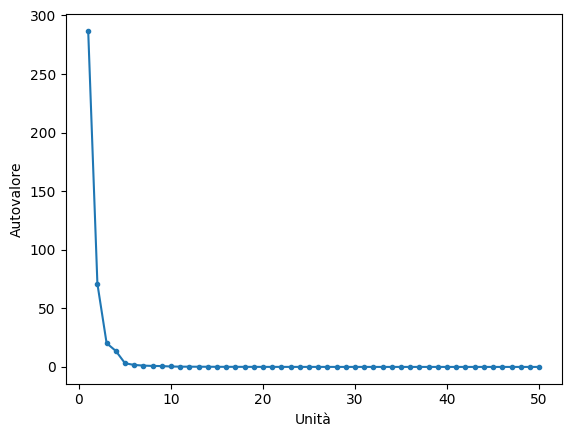

In [31]:
x1=perc_tab['Autovalori'].index+1
y1=perc_tab['Autovalori']
plt.plot(x1,y1, marker='.')
plt.xlabel('Unità')
plt.ylabel('Autovalore')

## Nuove features

In [32]:
PCA_y = pd.DataFrame(np.dot(train_data, eigenvectors))
PCA_y.columns = [f'Y{i+1}' for i in range(len(eigenvalues))]
PCA_y

,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,...,Y392,Y393,Y394,Y395,Y396,Y397,Y398,Y399,Y400,Y401
0,-0.281065+0.000000j,0.469606+0.000000j,-2.184286+0.000000j,-1.539333+0.000000j,2.708236+0.000000j,-0.367819+0.000000j,0.833160+0.000000j,1.215424+0.000000j,-1.955567+0.000000j,-0.677404+0.000000j,...,-0.082348+0.064760j,0.054537-0.008187j,0.054537+0.008187j,0.132731+0.008892j,0.132731-0.008892j,-0.128618+0.000000j,0.067209-0.070656j,0.067209+0.070656j,0.119068+0.000000j,-0.152011+0.000000j
1,-0.142205+0.000000j,0.511419+0.000000j,-2.195690+0.000000j,-1.537668+0.000000j,2.743329+0.000000j,-0.371856+0.000000j,0.812013+0.000000j,1.207182+0.000000j,-1.951907+0.000000j,-0.680944+0.000000j,...,-0.082997+0.064695j,0.053502-0.008954j,0.053502+0.008954j,0.134844+0.008377j,0.134844-0.008377j,-0.130988+0.000000j,0.066225-0.071739j,0.066225+0.071739j,0.116995+0.000000j,-0.149665+0.000000j
2,-0.340136+0.000000j,0.269001+0.000000j,-2.004610+0.000000j,-1.562274+0.000000j,2.646508+0.000000j,-0.317918+0.000000j,0.877145+0.000000j,1.194591+0.000000j,-1.874296+0.000000j,-0.670175+0.000000j,...,-0.079020+0.061974j,0.059849-0.007942j,0.059849+0.007942j,0.123459+0.008056j,0.123459-0.008056j,-0.120726+0.000000j,0.065220-0.066892j,0.065220+0.066892j,0.116554+0.000000j,-0.149205+0.000000j
3,0.058964+0.000000j,0.595993+0.000000j,-2.151398+0.000000j,-1.650960+0.000000j,2.816828+0.000000j,-0.365405+0.000000j,0.795751+0.000000j,1.203006+0.000000j,-1.985414+0.000000j,-0.652769+0.000000j,...,-0.081741+0.062688j,0.052519-0.008342j,0.052519+0.008342j,0.135527+0.007363j,0.135527-0.007363j,-0.136980+0.000000j,0.062640-0.073145j,0.062640+0.073145j,0.110689+0.000000j,-0.142726+0.000000j
4,0.001510+0.000000j,0.557617+0.000000j,-2.094644+0.000000j,-1.491983+0.000000j,2.634535+0.000000j,-0.403857+0.000000j,0.787911+0.000000j,1.207218+0.000000j,-1.987930+0.000000j,-0.671401+0.000000j,...,-0.079582+0.065012j,0.049834-0.008939j,0.049834+0.008939j,0.135951+0.007151j,0.135951-0.007151j,-0.133020+0.000000j,0.063051-0.069842j,0.063051+0.069842j,0.111704+0.000000j,-0.144946+0.000000j
5,0.031808+0.000000j,0.582355+0.000000j,-2.160850+0.000000j,-1.661937+0.000000j,2.826191+0.000000j,-0.352523+0.000000j,0.805732+0.000000j,1.197552+0.000000j,-1.979173+0.000000j,-0.638700+0.000000j,...,-0.082087+0.062969j,0.052863-0.008088j,0.052863+0.008088j,0.135649+0.007027j,0.135649-0.007027j,-0.136021+0.000000j,0.064025-0.072701j,0.064025+0.072701j,0.112735+0.000000j,-0.144903+0.000000j
6,-0.045796+0.000000j,0.523859+0.000000j,-2.057259+0.000000j,-1.524706+0.000000j,2.614584+0.000000j,-0.407011+0.000000j,0.790861+0.000000j,1.227817+0.000000j,-1.993897+0.000000j,-0.650689+0.000000j,...,-0.079420+0.064210j,0.052604-0.008689j,0.052604+0.008689j,0.133459+0.006649j,0.133459-0.006649j,-0.133452+0.000000j,0.063113-0.069455j,0.063113+0.069455j,0.112706+0.000000j,-0.145905+0.000000j
7,0.006911+0.000000j,0.611777+0.000000j,-2.075621+0.000000j,-1.531969+0.000000j,2.603989+0.000000j,-0.408460+0.000000j,0.782437+0.000000j,1.211575+0.000000j,-1.990245+0.000000j,-0.669267+0.000000j,...,-0.079101+0.064489j,0.049065-0.008807j,0.049065+0.008807j,0.136603+0.005466j,0.136603-0.005466j,-0.136123+0.000000j,0.062034-0.069529j,0.062034+0.069529j,0.110281+0.000000j,-0.143099+0.000000j
8,-0.095667+0.000000j,0.508596+0.000000j,-2.094941+0.000000j,-1.604500+0.000000j,2.669040+0.000000j,-0.385529+0.000000j,0.808153+0.000000j,1.208739+0.000000j,-1.945957+0.000000j,-0.683681+0.000000j,...,-0.080235+0.063183j,0.054290-0.008216j,0.054290+0.008216j,0.132007+0.006829j,0.132007-0.006829j,-0.133297+0.000000j,0.063647-0.070879j,0.063647+0.070879j,0.112375+0.000000j,-0.144875+0.000000j
9,-0.164997+0.000000j,0.535845+0.000000j,-2.091074+0.000000j,-1.611504+0.000000j,2.682093+0.000000j,-0.390476+0.000000j,0.799335+0.000000j,1.209961+0.000000j,-1.951518+0.000000j,-0.679864+0.000000j,...,-0.080854+0.063077j,0.053856-0.008490j,0.053856+0.008490j,0.132564+0.006578j,0.132564-0.006578j,-0.132541+0.000000j,0.064188-0.070851j,0.064188+0.070851j,0.11441

## Caratteristiche principali

In [33]:
rows = []

for i in range(15):
    Y = PCA_av.iloc[:, i]  # Colonna i degli autovettori
    max_index = np.argmax(np.abs(Y.values))  # Indice del valore massimo in modulo
    max_Y = Y.iloc[max_index]  # Valore massimo
    feature = PCA_av.index[max_index]  # Nome della feature corrispondente (es: V1, V2...)

    rows.append({
        'Principal Component': f'PC {i+1}',
        'Main Feature': ((feature)*2)+900,
        'Autovector': max_Y
    })

df_results = pd.DataFrame(rows)
df_results

,Principal Component,Main Feature,Autovector
0,PC 1,1270,-0.058473+0.000000j
1,PC 2,1128,0.117682+0.000000j
2,PC 3,1634,-0.155962+0.000000j
3,PC 4,1696,-0.141058+0.000000j
4,PC 5,1694,0.440870+0.000000j
5,PC 6,1694,0.181127+0.000000j
6,PC 7,1632,0.251780+0.000000j
7,PC 8,1692,-0.352175+0.000000j
8,PC 9,1692,0.388185+0.000000j
9,PC 10,1698,-0.465141+0.000000j


# Risultati 2

Corrisponde al 95% della varianza cumulata

In [34]:
PCA_y2 = PCA_y[[f'Y{i+1}' for i in range(5)]]
PCA_y2

,Y1,Y2,Y3,Y4,Y5
0,-0.281065+0.000000j,0.469606+0.000000j,-2.184286+0.000000j,-1.539333+0.000000j,2.708236+0.000000j
1,-0.142205+0.000000j,0.511419+0.000000j,-2.195690+0.000000j,-1.537668+0.000000j,2.743329+0.000000j
2,-0.340136+0.000000j,0.269001+0.000000j,-2.004610+0.000000j,-1.562274+0.000000j,2.646508+0.000000j
3,0.058964+0.000000j,0.595993+0.000000j,-2.151398+0.000000j,-1.650960+0.000000j,2.816828+0.000000j
4,0.001510+0.000000j,0.557617+0.000000j,-2.094644+0.000000j,-1.491983+0.000000j,2.634535+0.000000j
5,0.031808+0.000000j,0.582355+0.000000j,-2.160850+0.000000j,-1.661937+0.000000j,2.826191+0.000000j
6,-0.045796+0.000000j,0.523859+0.000000j,-2.057259+0.000000j,-1.524706+0.000000j,2.614584+0.000000j
7,0.006911+0.000000j,0.611777+0.000000j,-2.075621+0.000000j,-1.531969+0.000000j,2.603989+0.000000j
8,-0.095667+0.000000j,0.508596+0.000000j,-2.094941+0.000000j,-1.604500+0.000000j,2.669040+0.000000j
9,-0.164997+0.000000j,0.535845+0.000000j,-2.091074+0.000000j,-1.611504+0.000000j,2.682093+0.000000j


In [35]:
train_dataPCA2=PCA_y2
train_dataPCA2 = train_dataPCA2.applymap(lambda x: x.real if isinstance(x, complex) else x)

<ipython-input-35-5ca81a15926c>:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



### n-Trees fissato a 20

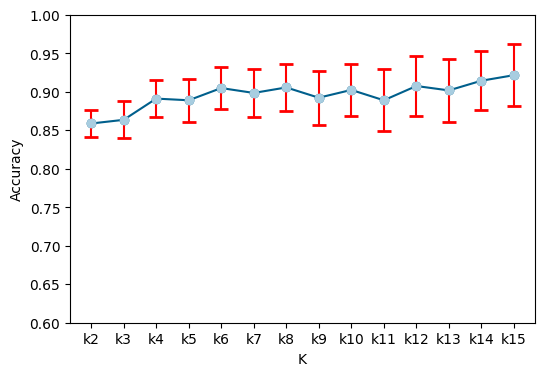

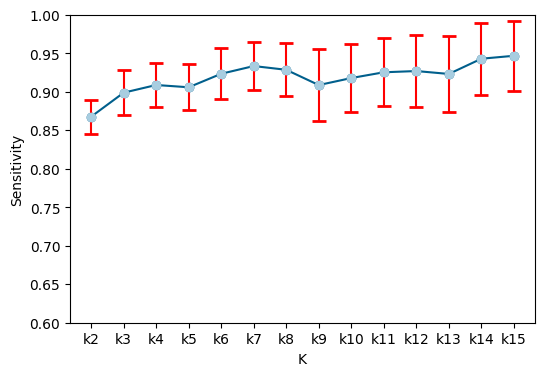

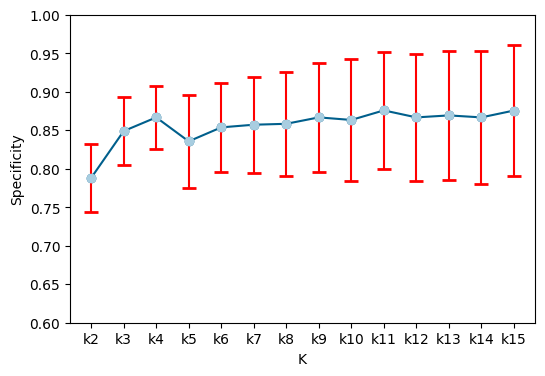

In [36]:
main(train_dataPCA2,labels_train)

### k fissato a 5

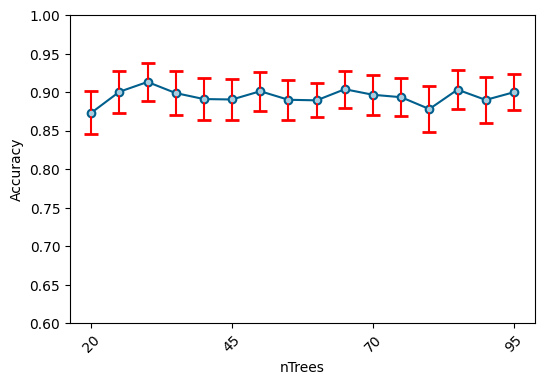

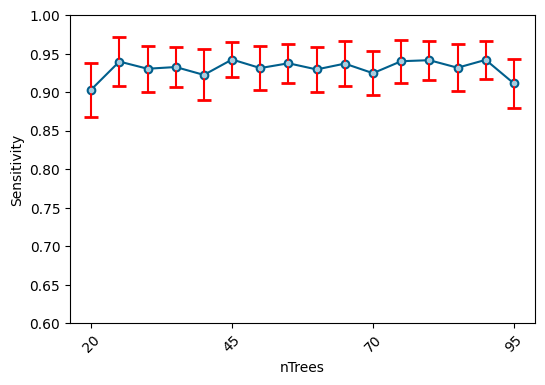

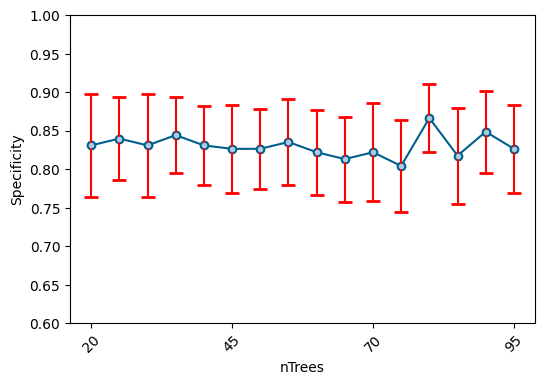

In [37]:
main_2(train_dataPCA2,labels_train)

### Grafico 3D

In [38]:
#main_3(train_dataPCA2, labels_train, N=15, n=15)

In [39]:
analizza_metriche(PCA5matAK,PCA5matdevAK , PCA5matSsK, PCA5matdevSsK,  PCA5matSpK, PCA5matdevSpK )

Massimo: 0.931, Errore: 0.031147696077193667


Massimo: 0.9633333333333334, Errore: 0.029015668579529183


Massimo: 0.8902777777777777, Errore: 0.03990959390033691


# RETI NEURALI

## Funzioni

### Sigmoide e SDG

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def SGD_method(weights, input_data, correct_output, LR=0.1, epochs=1000):
    N = len(input_data)
    for epoch in range(epochs):
        for k in range(N):
            inputs = input_data[k]
            expected = correct_output[k]
            lin_comb = sum(w * x for w, x in zip(weights, inputs))
            predicted = sigmoid(lin_comb)
            error = expected - predicted
            delta = predicted * (1 - predicted) * error
            weights = [w + LR * delta * x for w, x in zip(weights, inputs)]
    return weights

### Train e test

In [ ]:
def evaluate_model_NN(train_data, train_labels, validation_data, validation_labels, LR, epochs):
    np.random.seed(42)
    weights = 2 * np.random.rand(train_data.shape[1]) - 1
    trained_weights = SGD_method(weights.copy(), train_data, train_labels, LR=LR, epochs=epochs)

    predicted_labels = []
    for x in validation_data:
        lin_comb = sum(w * xi for w, xi in zip(trained_weights, x))
        y_pred = sigmoid(lin_comb)
        y_pred_label = 1 if y_pred >= 0.5 else 0
        predicted_labels.append(y_pred_label)

    cm = confusion_matrix(validation_labels, predicted_labels, labels=[0, 1])
    TN, FP, FN, TP = cm.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    return accuracy, sensitivity, specificity

### Cross validation

In [ ]:
def cross_validation_NN(df, labels, k, n, LR, epochs):
    accuracy_tot = []
    sensitivity_tot = []
    specificity_tot = []

    for _ in range(n):
        skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=None)
        for train_index, test_index in skf.split(df, labels):
            train_data, test_data = df[train_index], df[test_index]
            train_labels, test_labels = labels[train_index], labels[test_index]

            acc, sens, spec = evaluate_model_NN(train_data, train_labels, test_data, test_labels, LR, epochs)

            accuracy_tot.append(acc)
            sensitivity_tot.append(sens)
            specificity_tot.append(spec)

    return np.array(accuracy_tot), np.array(sensitivity_tot), np.array(specificity_tot)

### Grafico 3D

In [ ]:
def plot_3d(x_values, y_values, mat, M):
    X, Y = np.meshgrid(x_values, y_values)
    Z = mat.T

    fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])

    fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                      highlightcolor="limegreen", project_z=True))

    fig.update_layout(
        title=M,
        scene_camera_eye=dict(x=1.5, y=1.5, z=1),
        scene=dict(
            xaxis_title='LR',
            yaxis_title='Epochs',
            zaxis_title=M
        ),
        width=800, height=700
    )

    fig.show()

### Grafici 2D

In [ ]:
def plot_results_epoch(medie, dev, labels, M):
    colore_predominante = "#005F8C"
    colore_tenue = "#A8CDE0"

    plt.figure(figsize=(6, 4))
    plt.plot(labels, medie, linestyle='-', marker='o', color=colore_predominante, label="Accuracy")
    plt.errorbar(labels, medie, yerr=dev, fmt='o', capsize=5, capthick=2, color=colore_predominante, ecolor=colore_tenue)

    plt.ylabel(f"{M}")
    plt.xlabel("Epoch")
    plt.ylim(-0.2, 1.2)

    # Seleziona solo il primo, l'ultimo e il valore di mezzo
    step = len(labels) // 2  # Posizione di metà
    selected_labels = [labels[0], labels[step], labels[-1]]

    # Imposta i tick sull'asse x
    plt.xticks(selected_labels)

    # Ruota le etichette di 45 gradi
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_results_LR(medie, dev, labels, M):
    colore_predominante = "#005F8C"
    colore_tenue = "#A8CDE0"
    plt.figure(figsize=(6, 4))
    plt.plot(labels, medie, linestyle='-', marker='o', color=colore_predominante, label="Accuracy")
    plt.errorbar(labels, medie, yerr=dev, fmt='.', capsize=5, capthick=2, color=colore_predominante, ecolor=colore_tenue)
    plt.ylabel(f"{M}")
    plt.xlabel("LR")
    plt.ylim(-0.2, 1.2)

      # Seleziona solo il primo, l'ultimo e il valore di mezzo
    step = len(labels) // 2  # Posizione di metà
    selected_labels = [labels[0], labels[step], labels[-1]]

    # Imposta i tick sull'asse x
    plt.xticks(selected_labels)

    # Ruota le etichette di 45 gradi
    plt.xticks(rotation=45)

    plt.tight_layout()

    plt.show()

## Main

### Main Epoch fissato

In [ ]:
def main_ENN(df, labels, epochs=1100, N=5, n=3, path='.'):
    medieSs = []
    medieA = []
    medieSp = []
    devSs = []
    devA = []
    devSp = []
    label_names = []
    LR_values = [lr / 1000 for lr in range(10, 500, 10)]
    df_np = np.array(df)
    labels_np = np.array(labels)

    for LR in tqdm(LR_values, desc="Tuning learning rate"):
        accuracy_tot, sensitivity_tot, specificity_tot = cross_validation_NN(df_np, labels_np, k=N, n=n, LR=LR, epochs=epochs)

        mediaA = np.mean(accuracy_tot)
        sigmaA = np.std(accuracy_tot, ddof=1) / np.sqrt(n)

        mediaSs = np.mean(sensitivity_tot)
        sigmaSs = np.std(sensitivity_tot, ddof=1) / np.sqrt(n)

        mediaSp = np.mean(specificity_tot)
        sigmaSp = np.std(specificity_tot, ddof=1) / np.sqrt(n)

        medieSs.append(mediaSs)
        medieSp.append(mediaSp)
        medieA.append(mediaA)
        devA.append(sigmaA)
        devSs.append(sigmaSs)
        devSp.append(sigmaSp)
        label_names.append(f'{LR}')

    plot_results_LR(np.array(medieA), np.array(devA), label_names, "Accuracy")
    plot_results_LR(np.array(medieSs), np.array(devSs), label_names, "Sensitivity")
    plot_results_LR(np.array(medieSp), np.array(devSp), label_names, "Specificity")

### Main LR fissato

In [ ]:
def main_LRNN(df, labels, N_epochs=2000, LR=0.35, N=5, n=3, path='.'):
    medieSs = []
    medieSp = []
    medieA = []
    devSs = []
    devA = []
    devSp = []
    label_names = []
    df_np = np.array(df)
    labels_np = np.array(labels)
    epoch_values = list(range(500, N_epochs + 1, 300))

    for epochs in tqdm(epoch_values, desc="Training over epochs"):
        accuracy_tot, sensitivity_tot, specificity_tot = cross_validation_NN(df_np, labels_np, k=N, n=n, LR=LR, epochs=epochs)

        mediaA = np.mean(accuracy_tot)
        sigmaA = np.std(accuracy_tot, ddof=1) / np.sqrt(n)

        mediaSs = np.mean(sensitivity_tot)
        sigmaSs = np.std(sensitivity_tot, ddof=1) / np.sqrt(n)

        mediaSp = np.mean(specificity_tot)
        sigmaSp = np.std(specificity_tot, ddof=1) / np.sqrt(n)

        medieSs.append(mediaSs)
        medieA.append(mediaA)
        medieSp.append(mediaSp)
        devSs.append(sigmaSs)
        devA.append(sigmaA)
        devSp.append(sigmaSp)
        label_names.append(f'{epochs}')

    plot_results_epoch(np.array(medieA), np.array(devA), label_names, "Accuracy")
    plot_results_epoch(np.array(medieSs), np.array(devSs), label_names, "Sensitivity")
    plot_results_epoch(np.array(medieSp), np.array(devSp), label_names, "Specificity")


### Main salva metriche

In [ ]:
def main_3_NN(df, labels, N_epochs=2000, N=5, n=3, path='.'):
    matSs = []
    mat_devSs = []
    matSp = []
    mat_devSp = []
    matA = []
    mat_devA = []

    LR_values = [lr / 1000 for lr in range(10, 500, 10)]
    epoch_values = list(range(500, N_epochs + 1, 300))

    df_np = np.array(df)
    labels_np = np.array(labels)

    for LR in LR_values:
        medieSs = []
        medieSp = []
        medieA = []
        sigmeSs = []
        sigmeSp = []
        sigmeA = []

        for epochs in epoch_values:
            accuracy_tot, sensitivity_tot, specificity_tot = cross_validation_NN(df_np, labels_np, k=N, n=n, LR=LR, epochs=epochs)

            mediaA = np.mean(accuracy_tot)
            sigmaA = np.std(accuracy_tot, ddof=1) / np.sqrt(n)

            mediaSs = np.mean(sensitivity_tot)
            sigmaSs = np.std(sensitivity_tot, ddof=1) / np.sqrt(n)

            mediaSp = np.mean(specificity_tot)
            sigmaSp = np.std(specificity_tot, ddof=1) / np.sqrt(n)

            medieA.append(mediaA)
            sigmeA.append(sigmaA)
            medieSs.append(mediaSs)
            sigmeSs.append(sigmaSs)
            medieSp.append(mediaSp)
            sigmeSp.append(sigmaSp)

        matSs.append(medieSs)
        mat_devSs.append(sigmeSs)
        matA.append(medieA)
        mat_devA.append(sigmeA)
        matSp.append(medieSp)
        mat_devSp.append(sigmeSp)

    np.save(f"{path}/matdevAK_NN.npy", mat_devA)
    np.save(f"{path}/matAK_NN.npy", matA)
    np.save(f"{path}/matdevSpK_NN.npy", mat_devSp)
    np.save(f"{path}/matSpK_NN.npy", matSp)
    np.save(f"{path}/matdevSsK_NN.npy", mat_devSs)
    np.save(f"{path}/matSsK_NN.npy", matSs)

###  Main grafici 3D

In [ ]:
def analizza_metriche_NN(Ac, Acdev, Ss, Ssdev, Sp, Spdev):
    # Definizione degli assi
    LR_values = [lr / 1000 for lr in range(10, 500, 10)]
    epoch_values = list(range(500, 2000 + 1, 300)) #2000=N_epochs

    # Plot Accuratezza
    plot_3d(LR_values, epoch_values, Ac, "Accuracy")
    miglior_massimo(Ac, Acdev/np.sqrt(15))

    # Plot Sensibilità
    plot_3d(LR_values, epoch_values, Ss, "Sensitivity")
    miglior_massimo(Ss, Ssdev/np.sqrt(15))

    # Plot Specificità
    plot_3d(LR_values, epoch_values, Sp, "Specificity")
    miglior_massimo(Sp, Spdev/np.sqrt(15))

## Risultati

### Epoch Fissato 1100

Tuning learning rate: 100%|█████████████████████| 49/49 [38:54<00:00, 47.64s/it]


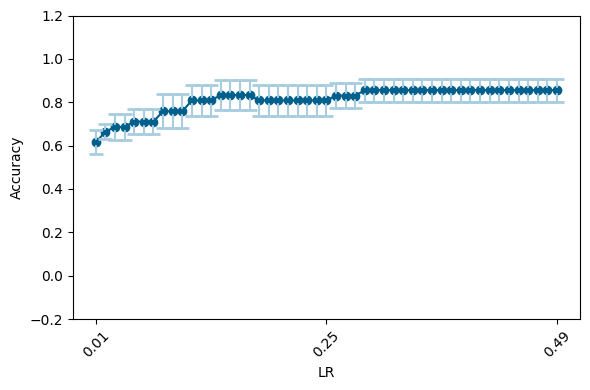

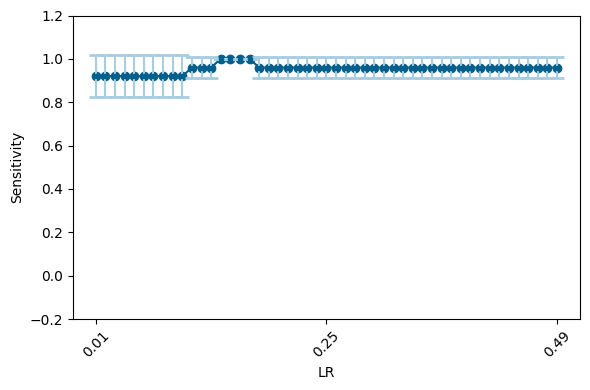

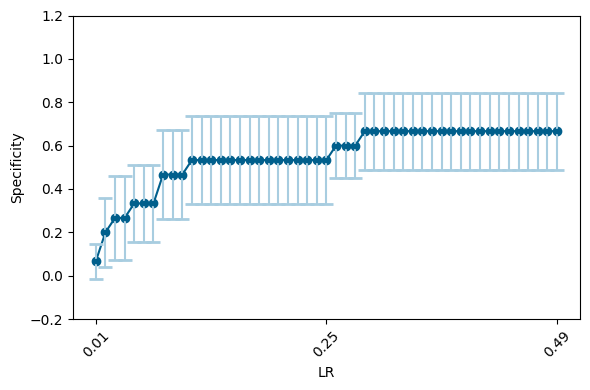

In [ ]:
main_ENN(train_data,labels_train)

### LR fissato a 0.35

Training over epochs: 100%|███████████████████████| 6/6 [05:23<00:00, 53.97s/it]


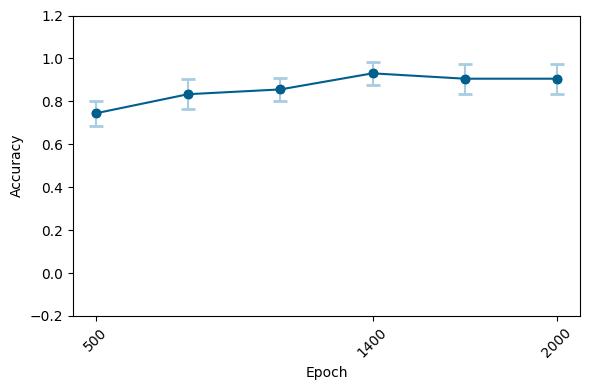

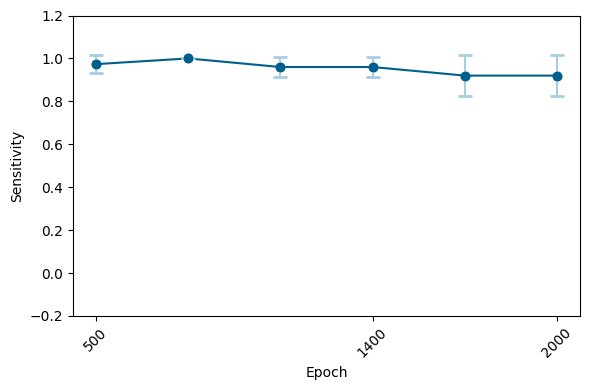

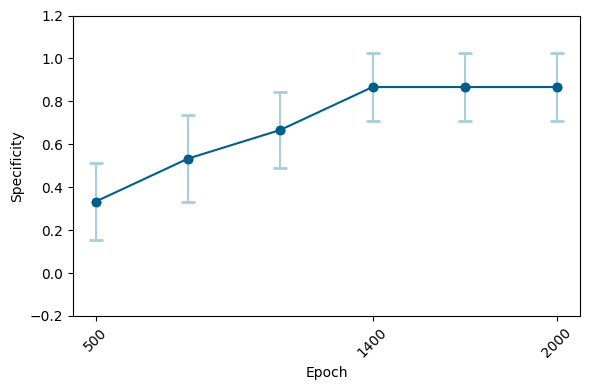

In [ ]:
main_LRNN(train_data,labels_train)

### Grafico 3D

In [ ]:
#main_3_NN(train_data, labels_train, N_epochs=2000, N=5, n=3, path=path)

In [ ]:
analizza_metriche_NN(matAK_NN, matdevAK_NN, matSsK_NN, matdevSsK_NN, matSpK_NN, matdevSpK_NN )

Massimo: 0.9305555555555556, Errore: 0.024170543385461995


Massimo: 1.0, Errore: 0.0


Massimo: 0.8666666666666667, Errore: 0.07126966450997983


# PCA CON NN

In [ ]:
main_3_NN(train_dataPCA2, labels_train, N_epochs=2000, N=5, n=3, path=path)

In [ ]:
analizza_metriche_NN(PCAmatAK_NN, PCAmatdevAK_NN, PCAmatSsK_NN, PCAmatdevSsK_NN, PCAmatSpK_NN, PCAmatdevSpK_NN )

Massimo: 0.9555555555555556, Errore: 0.008399210511316164


Massimo: 1.0, Errore: 0.0


Massimo: 0.9333333333333332, Errore: 0.020573779994945595


# SVM

## Funzioni

### Train e test

In [ ]:
def evaluate_model_SVM(train_data, train_labels, validation_data, validation_labels, C, kernel):
    model = SVC(C=C, kernel=kernel, random_state=42)
    model.fit(train_data, train_labels)
    predictions = model.predict(validation_data)

    cm = confusion_matrix(validation_labels, predictions, labels=[0, 1])
    TN, FP, FN, TP = cm.ravel()

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    return accuracy, sensitivity, specificity

### Cross validation

In [ ]:
def cross_validation_SVM(df, labels, k, n, C, kernel):
    accuracy_tot = []
    sensitivity_tot = []
    specificity_tot = []

    for _ in range(n):
        accuracy = 0
        sensitivity = 0
        specificity = 0

        skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=None)
        for train_index, test_index in skf.split(df, labels):
            train_data, test_data = df.iloc[train_index], df.iloc[test_index]
            train_labels, test_labels = labels[train_index], labels[test_index]

            acc, sens, spec = evaluate_model_SVM(train_data, train_labels, test_data, test_labels, C, kernel)

            accuracy_tot.append(acc)
            sensitivity_tot.append(sens)
            specificity_tot.append(spec)

    return np.array(accuracy_tot), np.array(sensitivity_tot), np.array(specificity_tot)

### Grafico 3D

In [ ]:
def plot_3d(x_values, y_values, mat, title, xlabel, ylabel):
    X, Y = np.meshgrid(x_values, y_values)
    Z = mat.T

    fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])

    fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                      highlightcolor="limegreen", project_z=True))

    fig.update_layout(
        scene_camera_eye=dict(x=1.5, y=1.5, z=1),
        scene=dict(
            xaxis_title=xlabel,
            yaxis_title=ylabel,
            zaxis_title=title
        ),
        width=800, height=700
    )

    fig.show()

### Grafici 2D

In [ ]:
def plot_results_epoch(medie, dev, labels, M):
    colore_predominante = "#005F8C"
    colore_tenue = "#A8CDE0"

    plt.figure(figsize=(6, 4))
    plt.plot(labels, medie, linestyle='-', marker='o', color=colore_predominante, label="Accuracy")
    plt.errorbar(labels, medie, yerr=dev, fmt='o', capsize=5, capthick=2, color=colore_predominante, ecolor=colore_tenue)

    plt.ylabel(f"{M}")
    plt.xlabel("Epoch")
    plt.ylim(-0.2, 1.2)

    # Seleziona solo il primo, l'ultimo e il valore di mezzo
    step = len(labels) // 2  # Posizione di metà
    selected_labels = [labels[0], labels[step], labels[-1]]

    # Imposta i tick sull'asse x
    plt.xticks(selected_labels)

    # Ruota le etichette di 45 gradi
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


In [ ]:
def plot_results_LR(medie, dev, labels, M):
    colore_predominante = "#005F8C"
    colore_tenue = "#A8CDE0"
    plt.figure(figsize=(6, 4))
    plt.plot(labels, medie, linestyle='-', marker='o', color=colore_predominante, label="Accuracy")
    plt.errorbar(labels, medie, yerr=dev, fmt='.', capsize=5, capthick=2, color=colore_predominante, ecolor=colore_tenue)
    plt.ylabel(f"{M}")
    plt.xlabel("LR")
    plt.ylim(-0.2, 1.2)

      # Seleziona solo il primo, l'ultimo e il valore di mezzo
    step = len(labels) // 2  # Posizione di metà
    selected_labels = [labels[0], labels[step], labels[-1]]

    # Imposta i tick sull'asse x
    plt.xticks(selected_labels)

    # Ruota le etichette di 45 gradi
    plt.xticks(rotation=45)

    plt.tight_layout()

    plt.show()

## Main

### Main C fissato

In [ ]:
def main_CSVM(df, labels, n=15, C=1000):
    medieSs = []
    medieA = []
    medieSp = []
    devSs = []
    devA = []
    devSp = []
    label_names = []
    kernel_values = ['linear', 'rbf', 'poly']

    for kernel in kernel_values:

      accuracy_tot, sensitivity_tot, specificity_tot = cross_validation_SVM(df, labels, k=5, n=n, C=C, kernel=kernel)

      mediaA = np.mean(accuracy_tot)
      sigmaA = np.std(accuracy_tot, ddof=1) / np.sqrt(n)

      mediaSs = np.mean(sensitivity_tot)
      sigmaSs = np.std(sensitivity_tot, ddof=1) / np.sqrt(n)

      mediaSp = np.mean(specificity_tot)
      sigmaSp = np.std(specificity_tot, ddof=1) / np.sqrt(n)

      medieSs.append(mediaSs)
      medieSp.append(mediaSp)
      medieA.append(mediaA)
      devA.append(sigmaA)
      devSs.append(sigmaSs)
      devSp.append(sigmaSp)
      label_names.append(f'Kernel {kernel}')


    plot_results_Kernel(np.array(medieA), np.array(devA), label_names, "Accuracy")
    plot_results_Kernel(np.array(medieSs), np.array(devSs), label_names, "Sensitivity")
    plot_results_Kernel(np.array(medieSp), np.array(devSp), label_names, "Specificity")

### Main Kernel lineare

In [ ]:
def main_KSVM(df, labels, n=15, k=5):

    medieSs = []
    medieSp = []
    medieA = []
    devSs = []
    devA = []
    devSp = []
    label_names = []
    C_values = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

    for C in C_values:

      accuracy_tot, sensitivity_tot, specificity_tot = cross_validation_SVM(df, labels, k=5, n=n, C=C, kernel='linear')

      mediaA = np.mean(accuracy_tot)
      sigmaA = np.std(accuracy_tot, ddof=1) / np.sqrt(n)

      mediaSs = np.mean(sensitivity_tot)
      sigmaSs = np.std(sensitivity_tot, ddof=1) / np.sqrt(n)

      mediaSp = np.mean(specificity_tot)
      sigmaSp = np.std(specificity_tot, ddof=1) / np.sqrt(n)

      medieSs.append(mediaSs)
      medieA.append(mediaA)
      medieSp.append(mediaSp)
      devSs.append(sigmaSs)
      devA.append(sigmaA)
      devSp.append(sigmaSp)
      label_names.append(f'{C}')

    plot_results_C(np.array(medieA), np.array(devA), label_names, "Accuracy")
    plot_results_C(np.array(medieSs), np.array(devSs), label_names, "Sensitivity")
    plot_results_C(np.array(medieSp), np.array(devSp), label_names, "Specificity")

### Main salva metriche

In [ ]:
def main_3_SVM(df, labels, n=15, path='.'):
    C_values = np.logspace(-2, 5, num=8)
    kernel_values = ['linear', 'rbf', 'poly']

    matSs = []
    mat_devSs = []
    matSp = []
    mat_devSp = []
    matA = []
    mat_devA = []

    for C in C_values:
        medieSs = []
        medieSp = []
        medieA = []
        sigmeSs = []
        sigmeSp = []
        sigmeA = []

        for kernel in kernel_values:
            accuracy_tot, sensitivity_tot, specificity_tot = cross_validation_SVM(df, labels, k=5, n=n, C=C, kernel=kernel)

            mediaA = np.mean(accuracy_tot)
            sigmaA = np.std(accuracy_tot, ddof=1) / np.sqrt(n)

            mediaSs = np.mean(sensitivity_tot)
            sigmaSs = np.std(sensitivity_tot, ddof=1) / np.sqrt(n)

            mediaSp = np.mean(specificity_tot)
            sigmaSp = np.std(specificity_tot, ddof=1) / np.sqrt(n)

            medieA.append(mediaA)
            sigmeA.append(sigmaA)
            medieSs.append(mediaSs)
            sigmeSs.append(sigmaSs)
            medieSp.append(mediaSp)
            sigmeSp.append(sigmaSp)

        matSs.append(medieSs)
        mat_devSs.append(sigmeSs)
        matA.append(medieA)
        mat_devA.append(sigmeA)
        matSp.append(medieSp)
        mat_devSp.append(sigmeSp)

    np.save(f"{path}/matdevAK_SVM.npy", mat_devA)
    np.save(f"{path}/matAK_SVM.npy", matA)
    np.save(f"{path}/matdevSpK_SVM.npy", mat_devSp)
    np.save(f"{path}/matSpK_SVM.npy", matSp)
    np.save(f"{path}/matdevSsK_SVM.npy", mat_devSs)
    np.save(f"{path}/matSsK_SVM.npy", matSs)


### Main grafici 3D

In [ ]:
def analizza_metriche_SVM(Ac, Acdev, Ss, Ssdev, Sp, Spdev):
    # Definizione degli assi
    C_values = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
    kernel_values = ['linear', 'rbf', 'poly']

    # Plot Accuratezza
    plot_3d(C_values, kernel_values, Ac, "Accuracy", "C values", "Kernel")
    miglior_massimo(Ac, Acdev)

    # Plot Sensibilità
    plot_3d(C_values, kernel_values, Ss, "Sensitivity", "C values", "Kernel")
    miglior_massimo(Ss, Ssdev)

    # Plot Specificità
    plot_3d(C_values, kernel_values, Sp, "Specificity", "C values", "Kernel")
    miglior_massimo(Sp, Spdev)

## Risultati

### C fissato a 100

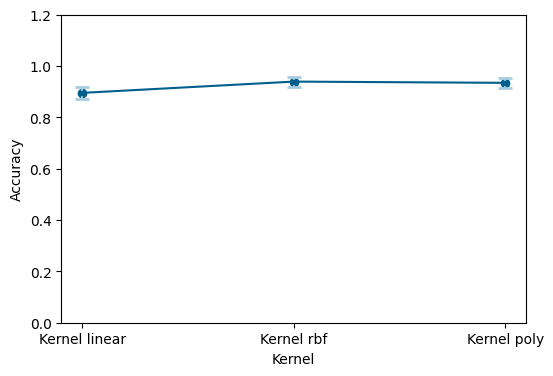

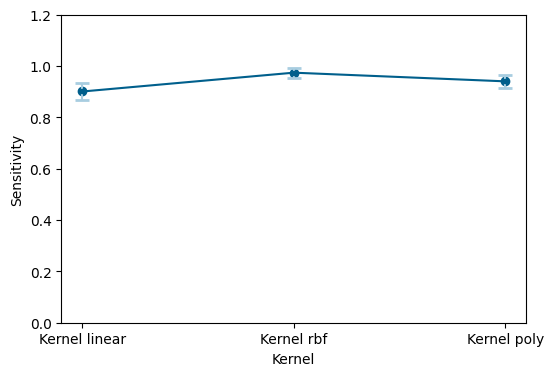

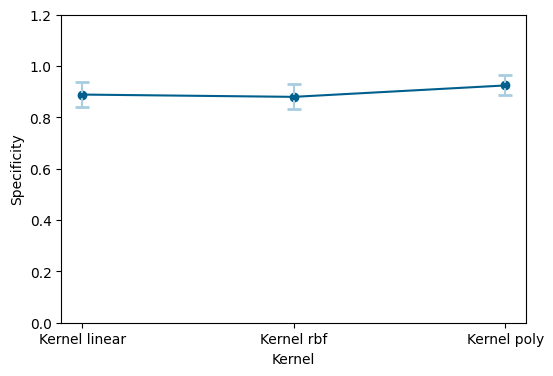

In [ ]:
main_CSVM(train_data,labels_train)

### Kernel fissato Lineare

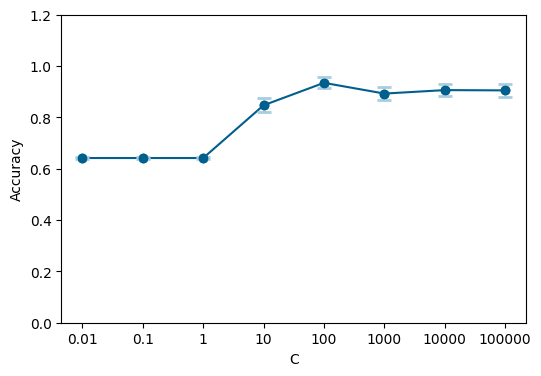

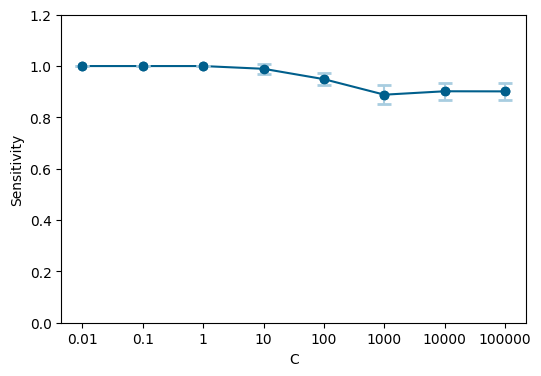

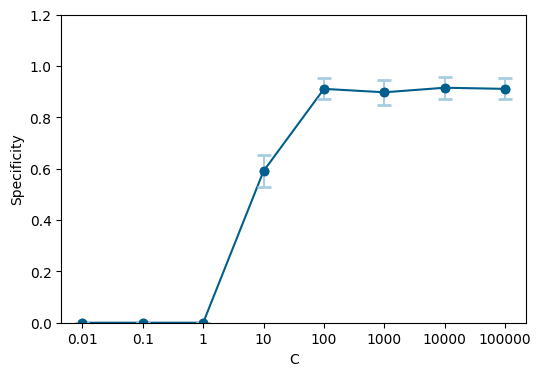

In [ ]:
main_KSVM(train_data,labels_train)

### Grafici 3D

In [ ]:
#main_3_SVM(train_data, labels_train, n=15, N=10, path=path)

In [ ]:
analizza_metriche_SVM(matAK_SVM, matdevAK_SVM, matSsK_SVM, matdevSsK_SVM, matSpK_SVM, matdevSpK_SVM )

Massimo: 0.9440740740740741, Errore: 0.020096438236482498


Massimo: 1.0, Errore: 0.0


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



Massimo: 0.9466666666666667, Errore: 0.03477368558564377


# EXTERNAL TESTING

Abbiamo fissato i valori ottimali di k e nTrees ottenuti massimizzando l’accuracy durante la validazione interna, poiché più oggettiva rispetto a sensitivity e specificity. Con questi parametri, abbiamo valutato il modello tramite un external test, variando gli indici della K-Fold nei dati di train.

Per ogni iterazione, le predizioni sul test sono ottenute con una strategia di voto a maggioranza tra i modelli dei diversi fold. In caso di parità, la scelta si basa sulla media delle probabilità. Il processo viene ripetuto 15 volte, e vengono calcolate media ed errore sulla media di accuracy, sensitivity e specificity.

In [ ]:
def valuta_modello_kfold(df_train, labels_train, df_test, labels_test, optimal_k, optimal_nTrees, ripetizioni=1):
    accuracies = []
    sensitivities = []
    specificities = []

    for i in range(ripetizioni):
        predictions_matrix = []
        probabilities_matrix = []

        skf = StratifiedKFold(n_splits=optimal_k, shuffle=True, random_state=None)

        for train_index, _ in skf.split(df_train, labels_train):
            X_fold = df_train.iloc[train_index]
            y_fold = labels_train[train_index]

            model = RandomForestClassifier(n_estimators=optimal_nTrees, random_state=42)
            model.fit(X_fold, y_fold)

            pred_probs = model.predict_proba(df_test)[:, 1]
            preds = model.predict(df_test)

            probabilities_matrix.append(pred_probs)
            predictions_matrix.append(preds)

        # Majority vote + probability tie-break
        predictions_df = pd.DataFrame(predictions_matrix)
        probabilities_df = pd.DataFrame(probabilities_matrix)

        final_prediction = []
        for col in predictions_df.columns:
            votes = predictions_df[col].value_counts()
            if votes.get(1, 0) > votes.get(0, 0):
                final_prediction.append(1)
            elif votes.get(0, 0) > votes.get(1, 0):
                final_prediction.append(0)
            else:
                mean_prob = probabilities_df[col].mean()
                final_prediction.append(1 if mean_prob > 0.5 else 0)

        # Valutazione
        print(final_prediction)
        cm = confusion_matrix(labels_test, final_prediction)

        if cm.shape == (2, 2):
            TN, FP, FN, TP = cm.ravel()
            accuracy = (TP + TN) / (TP + TN + FP + FN)
            sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
            specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

            accuracies.append(accuracy)
            sensitivities.append(sensitivity)
            specificities.append(specificity)
        else:
            print(f"Iterazione {i+1}: Confusion matrix non valida")

    # Risultati aggregati
    print(f"\n--- Risultati finali su {ripetizioni} iterazioni ---")
    print(f"Sensitivity: {np.mean(sensitivities):.4f} ± {(np.std(sensitivities, ddof=1)/np.sqrt(ripetizioni))}")
    print(f"Specificity: {np.mean(specificities):.4f} ± {(np.std(specificities, ddof=1)/np.sqrt(ripetizioni))}")
    print(f"Accuracy:   {np.mean(accuracies):.4f} ± {(np.std(accuracies, ddof=1)/np.sqrt(ripetizioni))}")

## Risultati RF

In [ ]:
valuta_modello_kfold(train_data, labels_train, test_data, labels_test, optimal_k=9, optimal_nTrees=25, ripetizioni=15)

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]

--- Risultati finali su 15 iterazioni ---
Sensitivity: 0.8133 ± 0.009085135251589958
Specificity: 1.0000 ± 0.0
Accuracy:   0.8963 ± 0.005047297361994423


## Risultati PCA

In [ ]:
testPCA = pd.DataFrame(np.dot(test_data, eigenvectors))
testPCA.columns = [f'Y{i+1}' for i in range(len(eigenvalues))]
testPCA

,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,...,Y392,Y393,Y394,Y395,Y396,Y397,Y398,Y399,Y400,Y401
0,-0.213062+0.000000j,0.518636+0.000000j,-2.195661+0.000000j,-1.531641+0.000000j,2.723720+0.000000j,-0.360682+0.000000j,0.818653+0.000000j,1.211140+0.000000j,-1.974544+0.000000j,-0.659796+0.000000j,...,-0.033517-0.039516j,-0.000840+0.115461j,-0.000840-0.115461j,-0.068577+0.000000j,0.078370-0.049478j,0.078370+0.049478j,0.043446+0.000000j,0.135689+0.094834j,0.135689-0.094834j,0.098453+0.000000j
1,-0.129844+0.000000j,0.501473+0.000000j,-2.117679+0.000000j,-1.436487+0.000000j,2.598878+0.000000j,-0.380920+0.000000j,0.812419+0.000000j,1.196749+0.000000j,-1.975190+0.000000j,-0.632277+0.000000j,...,-0.032194-0.040241j,-0.001226+0.114589j,-0.001226-0.114589j,-0.068005+0.000000j,0.080816-0.049133j,0.080816+0.049133j,0.043739+0.000000j,0.134857+0.096085j,0.134857-0.096085j,0.095831+0.000000j
2,-0.142116+0.000000j,0.329884+0.000000j,-2.064943+0.000000j,-1.413815+0.000000j,2.545488+0.000000j,-0.359507+0.000000j,0.848411+0.000000j,1.201559+0.000000j,-1.929043+0.000000j,-0.623306+0.000000j,...,-0.027618-0.036275j,0.001919+0.115782j,0.001919-0.115782j,-0.065378+0.000000j,0.075105-0.049889j,0.075105+0.049889j,0.039210+0.000000j,0.137386+0.092002j,0.137386-0.092002j,0.092200+0.000000j
3,-0.108019+0.000000j,0.521870+0.000000j,-2.127075+0.000000j,-1.632718+0.000000j,2.777013+0.000000j,-0.355047+0.000000j,0.839822+0.000000j,1.205304+0.000000j,-1.960258+0.000000j,-0.679178+0.000000j,...,-0.033591-0.042500j,-0.002312+0.113711j,-0.002312-0.113711j,-0.065143+0.000000j,0.080060-0.048836j,0.080060+0.048836j,0.045760+0.000000j,0.134546+0.094791j,0.134546-0.094791j,0.098187+0.000000j
4,-0.391359+0.000000j,0.291543+0.000000j,-2.171972+0.000000j,-1.479343+0.000000j,2.670677+0.000000j,-0.318477+0.000000j,0.870125+0.000000j,1.191711+0.000000j,-1.894254+0.000000j,-0.679352+0.000000j,...,-0.028893-0.033509j,0.001757+0.112826j,0.001757-0.112826j,-0.064106+0.000000j,0.073489-0.048369j,0.073489+0.048369j,0.041823+0.000000j,0.138003+0.087712j,0.138003-0.087712j,0.093359+0.000000j
5,-0.262191+0.000000j,0.365341+0.000000j,-2.049968+0.000000j,-1.603133+0.000000j,2.684592+0.000000j,-0.343434+0.000000j,0.854279+0.000000j,1.202175+0.000000j,-1.909622+0.000000j,-0.681158+0.000000j,...,-0.028574-0.037788j,0.002063+0.112113j,0.002063-0.112113j,-0.063090+0.000000j,0.073001-0.047862j,0.073001+0.047862j,0.044912+0.000000j,0.135087+0.088207j,0.135087-0.088207j,0.092577+0.000000j
6,-0.188108+0.000000j,0.491607+0.000000j,-2.177026+0.000000j,-1.476578+0.000000j,2.724041+0.000000j,-0.364495+0.000000j,0.837725+0.000000j,1.216388+0.000000j,-1.999563+0.000000j,-0.697646+0.000000j,...,-0.032263-0.039535j,-0.000721+0.114439j,-0.000721-0.114439j,-0.068475+0.000000j,0.077822-0.050113j,0.077822+0.050113j,0.046591+0.000000j,0.134464+0.094429j,0.134464-0.094429j,0.097180+0.000000j
7,0.123218+0.000000j,0.622629+0.000000j,-2.129026+0.000000j,-1.635712+0.000000j,2.798915+0.000000j,-0.371795+0.000000j,0.768787+0.000000j,1.193739+0.000000j,-1.971651+0.000000j,-0.640209+0.000000j,...,-0.036757-0.048023j,-0.003582+0.117176j,-0.003582-0.117176j,-0.067719+0.000000j,0.080584-0.048490j,0.080584+0.048490j,0.043108+0.000000j,0.132088+0.098721j,0.132088-0.098721j,0.103774+0.000000j
8,-0.191479+0.000000j,0.350421+0.000000j,-2.155239+0.000000j,-1.495413+0.000000j,2.700638+0.000000j,-0.338582+0.000000j,0.843768+0.000000j,1.189941+0.000000j,-1.910982+0.000000j,-0.671712+0.000000j,...,-0.028584-0.036039j,0.001039+0.112282j,0.001039-0.112282j,-0.064276+0.000000j,0.075677-0.049075j,0.075677+0.049075j,0.044678+0.000000j,0.136331+0.089514j,0.136331-0.089514j,0.093754+0.000000j
9,-0.108339+0.000000j,0.443368+0.000000j,-2.130786+0.000000j,-1.552536+0.000000j,2.700592+0.000000j,-0.370208+0.000000j,0.810779+0.000000j,1.198425+0.000000j,-1.937928+0.000000j,-0.681282+0.000000j,...,-0.031504-0.040097j,0.000073+0.114153j,0.000073-0.114153j,-0.066468+0.000000j,0.077025-0.048848j,0.077025+0.048848j,0.044480+0.000000j,0.134823+0.092533j,0.1

In [ ]:
testPCA_2 = testPCA[[f'Y{i+1}' for i in range(5)]]
testPCA_2

,Y1,Y2,Y3,Y4,Y5
0,-0.213062+0.000000j,0.518636+0.000000j,-2.195661+0.000000j,-1.531641+0.000000j,2.723720+0.000000j
1,-0.129844+0.000000j,0.501473+0.000000j,-2.117679+0.000000j,-1.436487+0.000000j,2.598878+0.000000j
2,-0.142116+0.000000j,0.329884+0.000000j,-2.064943+0.000000j,-1.413815+0.000000j,2.545488+0.000000j
3,-0.108019+0.000000j,0.521870+0.000000j,-2.127075+0.000000j,-1.632718+0.000000j,2.777013+0.000000j
4,-0.391359+0.000000j,0.291543+0.000000j,-2.171972+0.000000j,-1.479343+0.000000j,2.670677+0.000000j
5,-0.262191+0.000000j,0.365341+0.000000j,-2.049968+0.000000j,-1.603133+0.000000j,2.684592+0.000000j
6,-0.188108+0.000000j,0.491607+0.000000j,-2.177026+0.000000j,-1.476578+0.000000j,2.724041+0.000000j
7,0.123218+0.000000j,0.622629+0.000000j,-2.129026+0.000000j,-1.635712+0.000000j,2.798915+0.000000j
8,-0.191479+0.000000j,0.350421+0.000000j,-2.155239+0.000000j,-1.495413+0.000000j,2.700638+0.000000j
9,-0.108339+0.000000j,0.443368+0.000000j,-2.130786+0.000000j,-1.552536+0.000000j,2.700592+0.000000j


In [ ]:
testPCA_2 = testPCA_2.applymap(lambda x: x.real if isinstance(x, complex) else x)

<ipython-input-56-201abae3a68b>:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [ ]:
valuta_modello_kfold(train_dataPCA2, labels_train, testPCA_2, labels_test, optimal_k=6, optimal_nTrees=18, ripetizioni=15)

[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]

--- Risultati finali su 15 iterazioni ---
Sensitivity: 0.9000 ± 2.967195843610875e-17
Specificity: 0.8750 ± 0.0
Accuracy:   0.8889 ± 5.93439168722175e-17


## Risultati NN

In [ ]:
def valuta_modello_kfold_NN(df_train, labels_train, df_test, labels_test, optimal_k, best_LR, best_epochs, ripetizioni=1):
    accuracies = []
    sensitivities = []
    specificities = []

    df_train = np.array(df_train)
    labels_train = np.array(labels_train)
    df_test = np.array(df_test)
    labels_test = np.array(labels_test)

    for i in range(ripetizioni):
        predictions_matrix = []
        probabilities_matrix = []

        skf = StratifiedKFold(n_splits=optimal_k, shuffle=True, random_state=None)

        for train_index, _ in skf.split(df_train, labels_train):
            X_fold = df_train[train_index]
            y_fold = labels_train[train_index]

            # Inizializzazione casuale dei pesi
            np.random.seed(42)
            weights = 2 * np.random.rand(X_fold.shape[1]) - 1

            # Allenamento modello con i migliori iperparametri
            trained_weights = SGD_method(weights.copy(), X_fold, y_fold, LR=best_LR, epochs=best_epochs)

            preds = []
            probs = []
            for x in df_test:
                lin_comb = sum(w * xi for w, xi in zip(trained_weights, x))
                prob = sigmoid(lin_comb)
                pred_label = 1 if prob >= 0.5 else 0
                preds.append(pred_label)
                probs.append(prob)

            predictions_matrix.append(preds)
            probabilities_matrix.append(probs)

        # Majority vote + tie-break
        predictions_df = pd.DataFrame(predictions_matrix)
        probabilities_df = pd.DataFrame(probabilities_matrix)

        final_prediction = []
        for col in predictions_df.columns:
            votes = predictions_df[col].value_counts()
            if votes.get(1, 0) > votes.get(0, 0):
                final_prediction.append(1)
            elif votes.get(0, 0) > votes.get(1, 0):
                final_prediction.append(0)
            else:
                mean_prob = probabilities_df[col].mean()
                final_prediction.append(1 if mean_prob > 0.5 else 0)

        # Valutazione
        cm = confusion_matrix(labels_test, final_prediction)

        if cm.shape == (2, 2):
            TN, FP, FN, TP = cm.ravel()
            accuracy = (TP + TN) / (TP + TN + FP + FN)
            sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
            specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

            accuracies.append(accuracy)
            sensitivities.append(sensitivity)
            specificities.append(specificity)
        else:
            print(f"Iterazione {i+1}: Confusion matrix non valida")

    # Risultati aggregati
    print(f"\n--- Risultati finali su {ripetizioni} iterazioni ---")
    print(f"Sensitivity: {np.mean(sensitivities):.4f} ± {(np.std(sensitivities, ddof=1)/np.sqrt(ripetizioni)):.4f}")
    print(f"Specificity: {np.mean(specificities):.4f} ± {(np.std(specificities, ddof=1)/np.sqrt(ripetizioni)):.4f}")
    print(f"Accuracy:   {np.mean(accuracies):.4f} ± {(np.std(accuracies, ddof=1)/np.sqrt(ripetizioni)):.4f}")


In [ ]:
valuta_modello_kfold_NN(train_data, labels_train, test_data, labels_test, 5, 0.15, 2000, ripetizioni=15)


--- Risultati finali su 15 iterazioni ---
Sensitivity: 1.0000 ± 0.0000
Specificity: 1.0000 ± 0.0000
Accuracy:   1.0000 ± 0.0000


## Risultati NN

In [ ]:
def valuta_modello_kfold_NN(df_train, labels_train, df_test, labels_test, optimal_k, best_LR, best_epochs, ripetizioni=1):
    accuracies = []
    sensitivities = []
    specificities = []

    df_train = np.array(df_train)
    labels_train = np.array(labels_train)
    df_test = np.array(df_test)
    labels_test = np.array(labels_test)

    for i in range(ripetizioni):
        predictions_matrix = []
        probabilities_matrix = []

        skf = StratifiedKFold(n_splits=optimal_k, shuffle=True, random_state=None)

        for train_index, _ in skf.split(df_train, labels_train):
            X_fold = df_train[train_index]
            y_fold = labels_train[train_index]

            # Inizializzazione casuale dei pesi
            np.random.seed(42)
            weights = 2 * np.random.rand(X_fold.shape[1]) - 1

            # Allenamento modello con i migliori iperparametri
            trained_weights = SGD_method(weights.copy(), X_fold, y_fold, LR=best_LR, epochs=best_epochs)

            preds = []
            probs = []
            for x in df_test:
                lin_comb = sum(w * xi for w, xi in zip(trained_weights, x))
                prob = sigmoid(lin_comb)
                pred_label = 1 if prob >= 0.5 else 0
                preds.append(pred_label)
                probs.append(prob)

            predictions_matrix.append(preds)
            probabilities_matrix.append(probs)

        # Majority vote + tie-break
        predictions_df = pd.DataFrame(predictions_matrix)
        probabilities_df = pd.DataFrame(probabilities_matrix)

        final_prediction = []
        for col in predictions_df.columns:
            votes = predictions_df[col].value_counts()
            if votes.get(1, 0) > votes.get(0, 0):
                final_prediction.append(1)
            elif votes.get(0, 0) > votes.get(1, 0):
                final_prediction.append(0)
            else:
                mean_prob = probabilities_df[col].mean()
                final_prediction.append(1 if mean_prob > 0.5 else 0)

        # Valutazione
        cm = confusion_matrix(labels_test, final_prediction)

        if cm.shape == (2, 2):
            TN, FP, FN, TP = cm.ravel()
            accuracy = (TP + TN) / (TP + TN + FP + FN)
            sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
            specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

            accuracies.append(accuracy)
            sensitivities.append(sensitivity)
            specificities.append(specificity)
        else:
            print(f"Iterazione {i+1}: Confusion matrix non valida")

    # Risultati aggregati
    print(f"\n--- Risultati finali su {ripetizioni} iterazioni ---")
    print(f"Sensitivity: {np.mean(sensitivities):.4f} ± {(np.std(sensitivities, ddof=1)/np.sqrt(ripetizioni)):.4f}")
    print(f"Specificity: {np.mean(specificities):.4f} ± {(np.std(specificities, ddof=1)/np.sqrt(ripetizioni)):.4f}")
    print(f"Accuracy:   {np.mean(accuracies):.4f} ± {(np.std(accuracies, ddof=1)/np.sqrt(ripetizioni)):.4f}")


In [ ]:
valuta_modello_kfold_NN(train_dataPCA2, labels_train, testPCA_2, labels_test, 5, 0.44, 1400, ripetizioni=15)


--- Risultati finali su 15 iterazioni ---
Sensitivity: 0.9000 ± 0.0000
Specificity: 1.0000 ± 0.0000
Accuracy:   0.9444 ± 0.0000


## Risultati SVM

In [ ]:
def valuta_modello_SVM(df_train, labels_train, df_test, labels_test, optimal_C, optimal_Kernel, ripetizioni=15):
    accuracies = []
    sensitivities = []
    specificities = []

    for i in range(ripetizioni):
        predictions_matrix = []
        probabilities_matrix = []

        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)

        for train_index, _ in skf.split(df_train, labels_train):
            X_fold = df_train.iloc[train_index]
            y_fold = labels_train[train_index]

            model = SVC(C=optimal_C, kernel=optimal_Kernel, probability=True, random_state=42)
            model.fit(X_fold, y_fold)

            pred_probs = model.predict_proba(df_test)[:, 1]
            preds = model.predict(df_test)

            probabilities_matrix.append(pred_probs)
            predictions_matrix.append(preds)

        # Majority vote + probability tie-break
        predictions_df = pd.DataFrame(predictions_matrix)
        probabilities_df = pd.DataFrame(probabilities_matrix)

        final_prediction = []
        for col in predictions_df.columns:
            votes = predictions_df[col].value_counts()
            if votes.get(1, 0) > votes.get(0, 0):
                final_prediction.append(1)
            elif votes.get(0, 0) > votes.get(1, 0):
                final_prediction.append(0)
            else:
                mean_prob = probabilities_df[col].mean()
                final_prediction.append(1 if mean_prob > 0.5 else 0)

        # Valutazione
        cm = confusion_matrix(labels_test, final_prediction)

        if cm.shape == (2, 2):
            TN, FP, FN, TP = cm.ravel()
            accuracy = (TP + TN) / (TP + TN + FP + FN)
            sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
            specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

            accuracies.append(accuracy)
            sensitivities.append(sensitivity)
            specificities.append(specificity)
        else:
            print(f"Iterazione {i+1}: Confusion matrix non valida")

    # Risultati aggregati
    print(f"\n--- Risultati finali su {ripetizioni} iterazioni ---")
    print(f"Sensitivity: {np.mean(sensitivities):.4f} ± {(np.std(sensitivities, ddof=1)/np.sqrt(ripetizioni))}")
    print(f"Specificity: {np.mean(specificities):.4f} ± {(np.std(specificities, ddof=1)/np.sqrt(ripetizioni))}")
    print(f"Accuracy:   {np.mean(accuracies):.4f} ± {(np.std(accuracies, ddof=1)/np.sqrt(ripetizioni))}")

In [ ]:
valuta_modello_SVM(train_data, labels_train, test_data, labels_test,1000,'rbf', ripetizioni=15)


--- Risultati finali su 15 iterazioni ---
Sensitivity: 1.0000 ± 0.0
Specificity: 1.0000 ± 0.0
Accuracy:   1.0000 ± 0.0


# T_TEST Train

## Tra RF e PCA

In [ ]:
max=np.max(matAK)
maxPCA=np.max(PCA2matAK)
max_index=np.unravel_index(np.argmax(matAK),matAK.shape)
maxPCA_index=np.unravel_index(np.argmax(PCA2matAK),PCA2matAK.shape)
maxdev=matdevAK[max_index]
maxdevPCA=PCA2matdevAK[maxPCA_index]

print(f"Il massimo valore è: {max} ± {maxdev}" )
print(f"Il massimo valore è: {maxPCA} ± {maxdevPCA}" )


t_stat = (max - maxPCA) / np.sqrt((maxdev**2 / 15) + (maxdevPCA**2 / 15))

# Calcolo dei gradi di libertà con la formula di Welch-Satterthwaite
gdl = ((maxdev**2 / 15 + maxdevPCA**2 / 15) ** 2) / (
    ((maxdev**2 / 15) ** 2) / (15 - 1) + ((maxdevPCA**2 / 15) ** 2) / (15 - 1)
)

# Calcolo del p-value
p_value = stats.t.sf(abs(t_stat), gdl) * 2  # Test a due code

print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of Freedom: {gdl:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretazione
alpha = 0.05
if p_value < alpha:
    print("Ci sono differenze statisticamente significative tra i due gruppi.")
else:
    print("Non ci sono differenze significative tra i due gruppi.")

Il massimo valore è: 0.900462962962963 ± 0.04206650011023039
Il massimo valore è: 0.935042735042735 ± 0.03361557019536965
T-statistic: -2.4871
Degrees of Freedom: 26.70
P-value: 0.0194
Ci sono differenze statisticamente significative tra i due gruppi.


La migliore è la PCA

## Tra PCA e NN

In [ ]:
max=np.max(matAK_NN)
maxPCA=np.max(PCA2matAK)
max_index=np.unravel_index(np.argmax(matAK_NN),matAK_NN.shape)
maxPCA_index=np.unravel_index(np.argmax(PCA2matAK),PCA2matAK.shape)
maxdev=matdevAK_NN[max_index]
maxdevPCA=PCA2matdevAK[maxPCA_index]
print(f"Il massimo valore è: {max} ± {maxdev}" )
print(f"Il massimo valore è: {maxPCA} ± {maxdevPCA}" )


t_stat = (max - maxPCA) / np.sqrt((maxdev**2 / 15) + (maxdevPCA**2 / 15))

# Calcolo dei gradi di libertà con la formula di Welch-Satterthwaite
gdl = ((maxdev**2 / 15 + maxdevPCA**2 / 15) ** 2) / (
    ((maxdev**2 / 15) ** 2) / (15 - 1) + ((maxdevPCA**2 / 15) ** 2) / (15 - 1)
)

# Calcolo del p-value
p_value = stats.t.sf(abs(t_stat), gdl) * 2  # Test a due code

print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of Freedom: {gdl:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretazione
alpha = 0.05
if p_value < alpha:
    print("Ci sono differenze statisticamente significative tra i due gruppi.")
else:
    print("Non ci sono differenze significative tra i due gruppi.")

Il massimo valore è: 0.9305555555555556 ± 0.09361211200067815
Il massimo valore è: 0.935042735042735 ± 0.03361557019536965
T-statistic: -0.1747
Degrees of Freedom: 17.55
P-value: 0.8633
Non ci sono differenze significative tra i due gruppi.


sono molto simili

## Tra NN e SVM

In [ ]:
max=np.max(matAK_NN)
maxSVM=np.max(PCA2matAK)
max_index=np.unravel_index(np.argmax(matAK_NN),matAK_NN.shape)
maxSVM_index=np.unravel_index(np.argmax(matAK_SVM),matAK_SVM.shape)
maxdev=matdevAK_NN[max_index]
maxdevSVM=matdevAK_SVM[maxSVM_index]
print(f"Il massimo valore è: {max} ± {maxdev}" )
print(f"Il massimo valore è: {maxSVM} ± {maxdevSVM}" )


t_stat = (max - maxSVM) / np.sqrt((maxdev**2 / 15) + (maxdevSVM**2 / 15))

# Calcolo dei gradi di libertà con la formula di Welch-Satterthwaite
gdl = ((maxdev**2 / 15 + maxdevSVM**2 / 15) ** 2) / (
    ((maxdev**2 / 15) ** 2) / (15 - 1) + ((maxdevSVM**2 / 15) ** 2) / (15 - 1)
)

# Calcolo del p-value
p_value = stats.t.sf(abs(t_stat), gdl) * 2  # Test a due code

print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of Freedom: {gdl:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretazione
alpha = 0.05
if p_value < alpha:
    print("Ci sono differenze statisticamente significative tra i due gruppi.")
else:
    print("Non ci sono differenze significative tra i due gruppi.")

Il massimo valore è: 0.9305555555555556 ± 0.09361211200067815
Il massimo valore è: 0.935042735042735 ± 0.020096438236482498
T-statistic: -0.1815
Degrees of Freedom: 15.29
P-value: 0.8584
Non ci sono differenze significative tra i due gruppi.


molto simili

# T_TEST Test

## Tra RF e PCA

In [ ]:
max=0.8963
maxPCA=0.8963
maxdev= 0.005047297361994424
maxdevPCA=0.01196048101106594

print(f"Il massimo valore è: {max} ± {maxdev}" )
print(f"Il massimo valore è: {maxPCA} ± {maxdevPCA}" )


t_stat = (max - maxPCA) / np.sqrt((maxdev**2 / 15) + (maxdevPCA**2 / 15))

# Calcolo dei gradi di libertà con la formula di Welch-Satterthwaite
gdl = ((maxdev**2 / 15 + maxdevPCA**2 / 15) ** 2) / (
    ((maxdev**2 / 15) ** 2) / (15 - 1) + ((maxdevPCA**2 / 15) ** 2) / (15 - 1)
)

# Calcolo del p-value
p_value = stats.t.sf(abs(t_stat), gdl) * 2  # Test a due code

print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of Freedom: {gdl:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretazione
alpha = 0.05
if p_value < alpha:
    print("Ci sono differenze statisticamente significative tra i due gruppi.")
else:
    print("Non ci sono differenze significative tra i due gruppi.")

Il massimo valore è: 0.8963 ± 0.005047297361994424
Il massimo valore è: 0.8963 ± 0.01196048101106594
T-statistic: 0.0000
Degrees of Freedom: 18.83
P-value: 1.0000
Non ci sono differenze significative tra i due gruppi.


La migliore è la PCA

## Tra PCA e NN

In [ ]:
max=1
maxPCA=0.8963
maxdev= 0.0
maxdevPCA=0.01196048101106594
print(f"Il massimo valore è: {max} ± {maxdev}" )
print(f"Il massimo valore è: {maxPCA} ± {maxdevPCA}" )


t_stat = (max - maxPCA) / np.sqrt((maxdev**2 / 15) + (maxdevPCA**2 / 15))

# Calcolo dei gradi di libertà con la formula di Welch-Satterthwaite
gdl = ((maxdev**2 / 15 + maxdevPCA**2 / 15) ** 2) / (
    ((maxdev**2 / 15) ** 2) / (15 - 1) + ((maxdevPCA**2 / 15) ** 2) / (15 - 1)
)

# Calcolo del p-value
p_value = stats.t.sf(abs(t_stat), gdl) * 2  # Test a due code

print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of Freedom: {gdl:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretazione
alpha = 0.05
if p_value < alpha:
    print("Ci sono differenze statisticamente significative tra i due gruppi.")
else:
    print("Non ci sono differenze significative tra i due gruppi.")

Il massimo valore è: 1 ± 0.0
Il massimo valore è: 0.8963 ± 0.01196048101106594
T-statistic: 33.5796
Degrees of Freedom: 14.00
P-value: 0.0000
Ci sono differenze statisticamente significative tra i due gruppi.


sono molto simili

## Tra NN e SVM

molto simili